<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder


# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.metrics import Recall
import random
import time
from tensorflow.keras import backend as K
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics


In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#loading data into a pandas dataframe
path="/content/drive/MyDrive/Great_Learning/files/Neural_Networks/project_4/Churn.csv"
Churn_df=pd.read_csv(path)

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
Churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
Churn_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Understand the shape of the dataset

In [ ]:
Churn_df.shape

(10000, 14)

###Observation:

 *   The dataset has 10000 rows and 14 columns of data.

## Check the data types of the columns for the dataset

In [ ]:
Churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Obsrvations:

*   The dataset consists of 10,000 entries with 14 columns. All columns have non-null values, indicating no missing data. The data types are as follows.

**Numeric:**

*    9 columns (int64 and float64 types) — these include features like CreditScore, Age, Balance, and EstimatedSalary.

**Categorical:**

*    3 columns (object types) — these include Geography, Gender, and Surname.

*   The dataset has a memory usage of 1.1+ MB, which is manageable for analysis.

#Sanity checks

## Check for missing values

In [ ]:
# Check for null values in the entire DataFrame
print(Churn_df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
missing_values = Churn_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


### Observations:

*   The dataset has no missing values in any of its columns, as confirmed by the check.

*    All columns are fully populated with valid data, which is ideal for further analysis without the need for imputation or handling of missing values.

##Duplicate Values

In [ ]:
# Checking for duplicate rows in the DataFrame
duplicate_rows = Churn_df.duplicated().sum()


In [ ]:
# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


### Observations:

*   There are no duplicate rows in the dataset, as indicated by the result of 0 when checking for duplicates.

## Summary of the dataset

In [ ]:
Churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Observations:

**RowNumber & CustomerId:**

*   Both have unique values, with RowNumber ranging from 1 to 10,000 and CustomerId ranging from 15,565,701 to 15,815,690.

**CreditScore:**

*   The mean is 650.53, with scores ranging from 350 to 850, showing a fairly diverse range of credit scores.

**Age:**

*   The average age is 38.92, with ages ranging from 18 to 92, indicating a broad age group.

**Tenure:**

*   The average tenure is 5.01 years, with most customers having a tenure between 0 and 10 years.

**Balance:**

*   The mean balance is 76,485.89, with some customers having zero balance and others as high as 250,898.09, suggesting significant variation in customer account balances.

**NumOfProducts:**

*   The average number of products per customer is 1.53, with most customers holding 1 or 2 products.

**HasCrCard & IsActiveMember:**

*   70.55% of customers have a credit card (HasCrCard = 1), and 51.51% are active members (IsActiveMember = 1).

**EstimatedSalary:**

*   The average salary is 100,090.24, with salaries ranging from 11.58 to 199,992.48, indicating significant salary variation.

**Exited:**

*   20.37% of customers have exited, with most customers staying (Exited = 0).

# Statistical summary of the dataset

In [ ]:
stat_summary = Churn_df.describe()
# Display the statistical summary
print("Statistical summary of the dataset:\n", stat_summary)

Statistical summary of the dataset:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        

### Observations

**CreditScore:**

*    Mean: 650.53, with a standard deviation of 96.65, showing a moderate spread around the average score.

*   Minimum: 350, maximum: 850, indicating that scores cover the full range typically used in credit scoring.

**Age:**

*   Mean: 38.92, with a standard deviation of 10.49, indicating a fairly young customer base on average.

*   Minimum: 18, maximum: 92, with a range of ages reflecting a diverse age group.

**Tenure:**

*   Mean: 5.01, with a spread from 0 to 10, suggesting that most customers have been with the bank for a few years.

**Balance:**

*   Mean: 76,485.89, with a large spread (std = 62,397.40), indicating a wide variation in customer balances.

*   Some customers have a balance of 0, while others have significantly higher balances, up to 250,898.09.

**NumOfProducts:**

*   Mean: 1.53, with values ranging from 1 to 4, showing that most customers hold 1 or 2 products.

**HasCrCard & IsActiveMember:**

*   Both columns show binary distribution (0 or 1), with 70.55% of customers having a credit card and 51.51% being active members.

**EstimatedSalary:**

*   Mean: 100,090.24, with a large spread (std = 57,510.49), showing significant variance in salaries.

*   Minimum salary: 11.58 and maximum salary: 199,992.48.

**Exited:**

*   Mean: 0.20, indicating that around 20% of customers have exited the bank, with the majority staying (0) and a smaller group exiting (1).

*   These statistics provide insight into the data's range, spread, and central tendency, revealing diverse customer profiles in terms of financial products, balances, and salary.

### Checking for unique values for each of the column

In [ ]:
Churn_df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


### Observations:

*    RowNumber and CustomerId have 10,000 unique values, indicating they are unique identifiers for each customer.

*    Surname has 2,932 unique values, likely showing some repetition of customer names.

*    CreditScore has 460 unique values, indicating a wide range of credit scores.

*    Geography has 3 unique values, corresponding to the three countries in the dataset (likely France, Spain, Germany).

*    Gender has 2 unique values, representing male and female.

*    Age has 70 unique values, showing variation in customer ages.

*   Tenure has 11 unique values, indicating the range of years customers have been with the bank.

*    Balance has 6,382 unique values, indicating diverse account balances.

*    NumOfProducts has 4 unique values, reflecting the number of products customers hold with the bank.

*    HasCrCard and IsActiveMember both have 2 unique values, likely indicating binary status (yes/no).

*    EstimatedSalary has 9,999 unique values, showing that nearly all customers have distinct salary values.

*    Exited has 2 unique values, representing whether a customer exited the bank (yes/no).


## Drop unique or irrelevant columns

In [ ]:
# Drop unique or irrelevant columns
churn_df = Churn_df.drop([ 'CustomerId','RowNumber', 'Surname'], axis=1)

In [ ]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Observations:

*    After dropping the unique or irrelevant columns (CustomerId, RowNumber, Surname), the dataset now contains 11 columns. The relevant columns include:

*    CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited.

*    This reduced set of features is more focused and relevant for analysis or modeling purposes.

## Exploratory Data Analysis

### Univariate Analysis

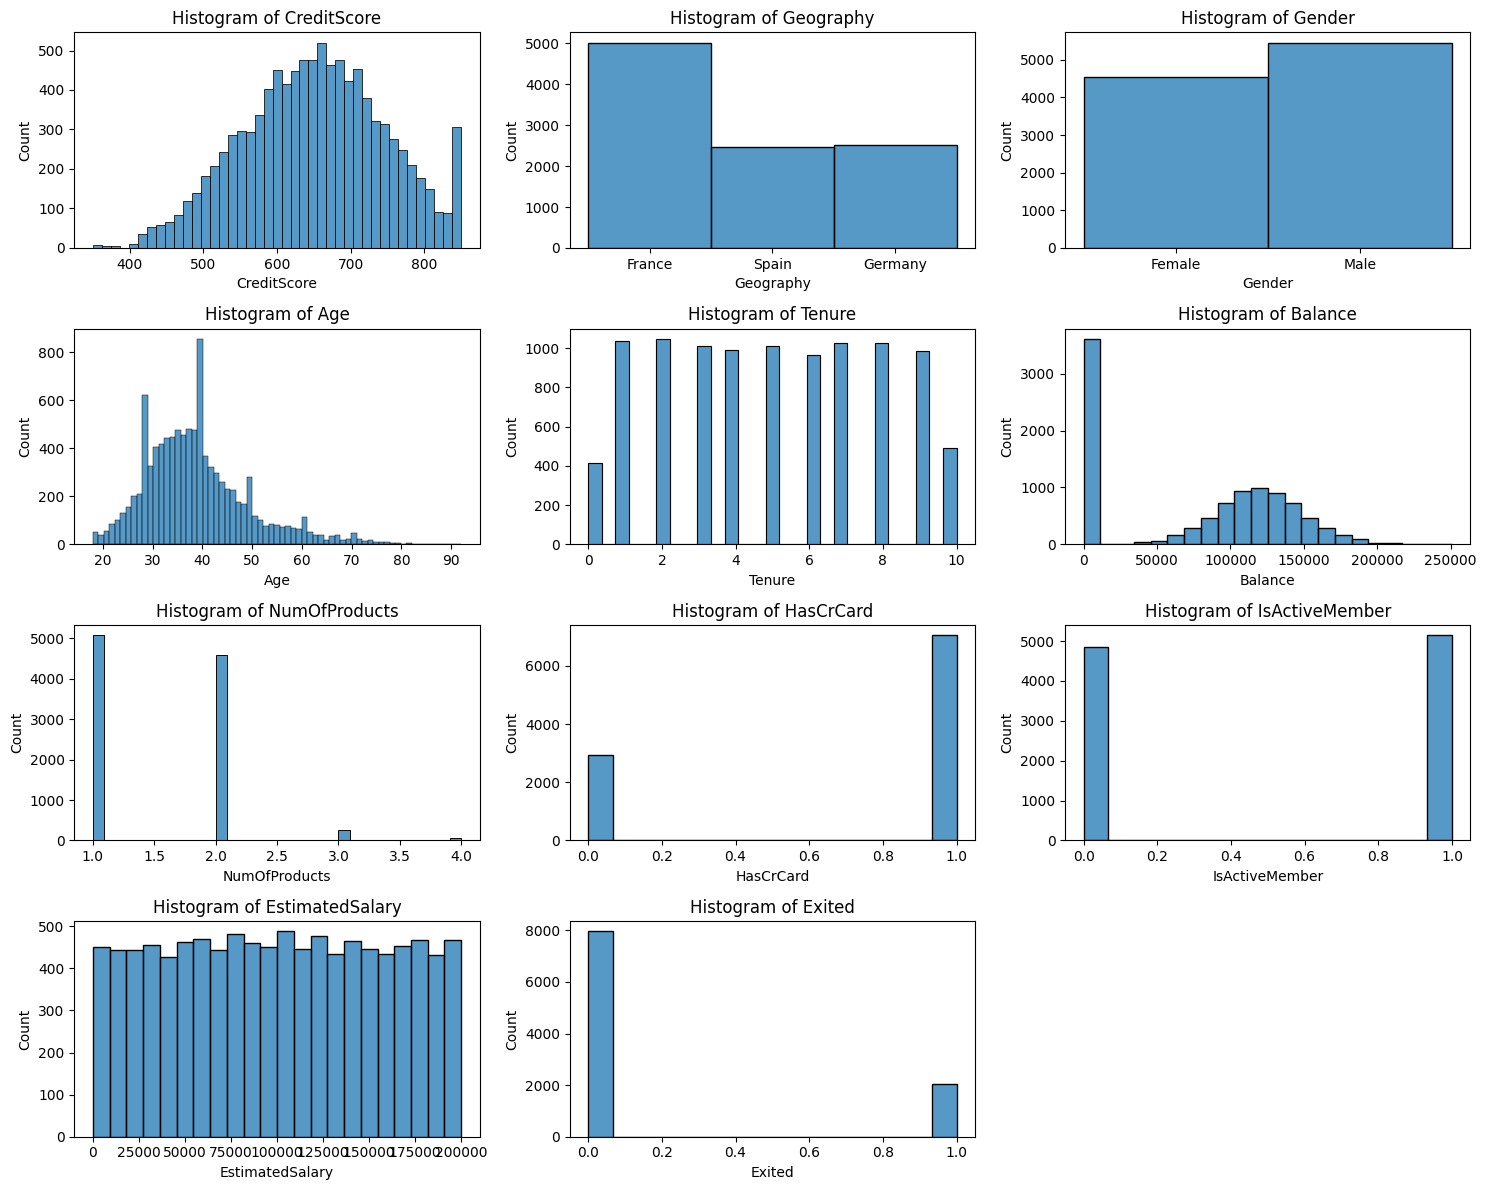

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 12))

# number of features (10 in my case)
num_features = len(churn_df.columns)

# setting the number of rows and columns based on the number of features
rows = (num_features // 3) + 1 if num_features % 3 != 0 else num_features // 3
cols = 3

# plotting the histogram for each numerical feature
for i, feature in enumerate(churn_df.columns):
    plt.subplot(rows, cols, i+1)  # adjust grid size dynamically
    sns.histplot(data=churn_df, x=feature)  # plot the histogram
    plt.title(f'Histogram of {feature}')  # add title for each subplot

plt.tight_layout()  # to add spacing between plots
plt.show()

###Observations:

**CreditScore:**

 *  Normally distributed, most scores between 600–800. Few extremes.

**Geography:**

 *  France dominates; imbalance across regions.

**Gender:**

*  Slight male majority.

**Age:**

*  Right-skewed, most are 30–40 years old.

**Tenure:**

*   Evenly distributed (0–10 years).

**Balance:**

*  Bell-shaped, most balances between 100K–150K; many have zero balance.

**NumOfProducts:**

*  Most use 1–2 products; few use 3–4.

**HasCrCard:**

*  Majority hold credit cards (1).

**IsActiveMember:**

*   Fairly balanced; slightly more active (1).

**EstimatedSalary:**

*   Uniformly distributed without bias.

**Exited:**

*    Highly imbalanced; most customers have not exited (0).

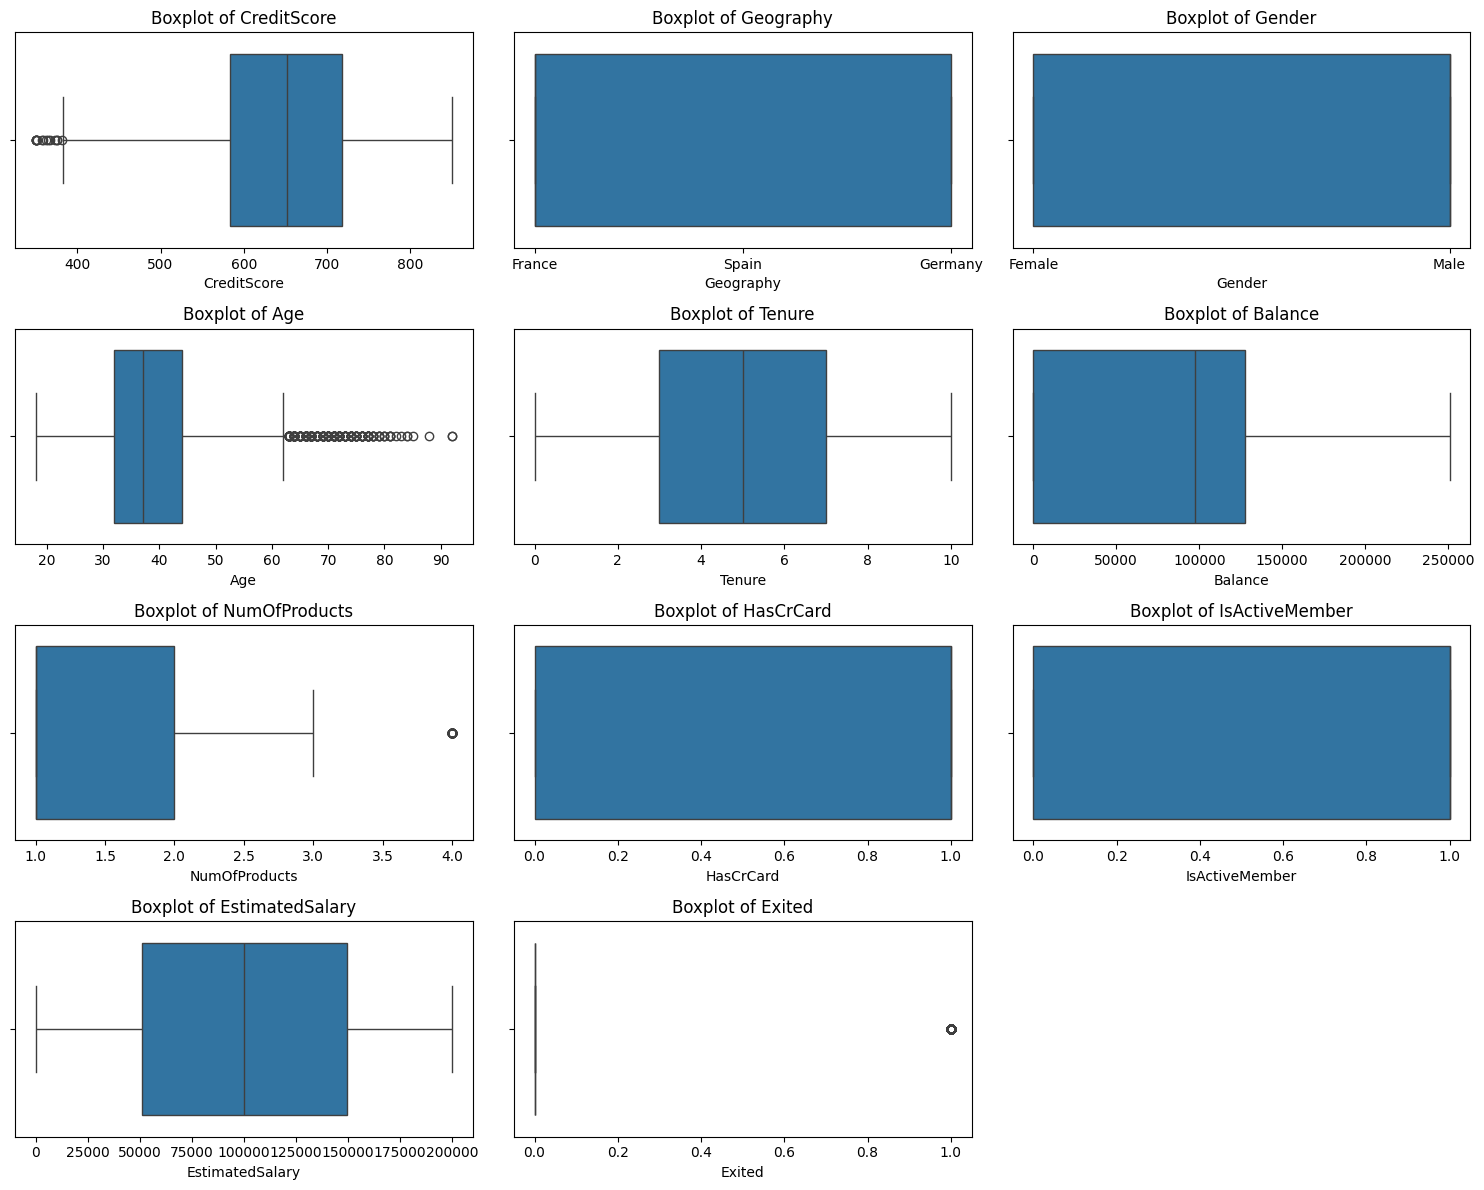

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 12))

# number of features (10 in my case)
num_features = len(churn_df.columns)

# setting the number of rows and columns based on the number of features
rows = (num_features // 3) + 1 if num_features % 3 != 0 else num_features // 3
cols = 3

# plotting the boxplot for each numerical feature
for i, feature in enumerate(churn_df.columns):
    plt.subplot(rows, cols, i+1)    # adjust grid size dynamically
    sns.boxplot(data=churn_df, x=feature)    # plot the boxplot
    plt.title(f'Boxplot of {feature}')  # add title for each subplot

plt.tight_layout()   # to add spacing between plots
plt.show()

### Observations :

**CreditScore:**

*  Concentrated between 600-800, with few low outliers (<400).

**Geography & Gender:**

*   Categorical; no variability.

**Age:**

*  Most customers are aged 30-50.

*  Few high outliers (>60).

**Tenure:**

*  Evenly distributed (0-10); no outliers.

**Balance:**

*   Many customers have zero balance.

*   Most balances range between 0-200,000.

**NumOfProducts:**

*   Most use 1-2 products; a few outliers with 3-4.

*   HasCrCard & IsActiveMember:

*  Binary features; no outliers.

**EstimatedSalary:**

*  Evenly distributed without significant outliers.

**Exited:**

*   Highly imbalanced; majority have not exited.

*   Outlier present for exited customers (1).

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="Yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##histogram_boxplox Visualize the CreditScore

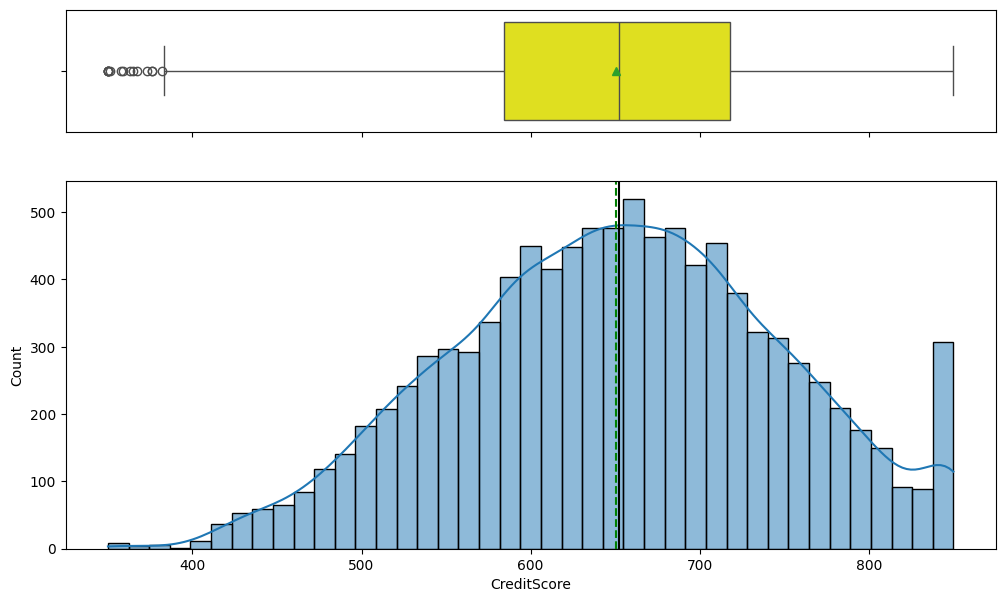

In [ ]:
# Use the correct DataFrame name
histogram_boxplot(churn_df, 'CreditScore', kde=True)
#histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

## Observations

**Distribution Shape:**

*   The CreditScore distribution appears to be approximately normal with a slight skew towards the lower end.

*   The distribution peaks around 600-700, indicating that most individuals in this dataset have credit scores within this range.

**Outliers:**

*   The boxplot shows outliers on the lower end of the credit score spectrum, as indicated by individual points below the lower whisker.

*   These outliers may represent individuals with unusually low credit scores compared to the rest of the dataset.

**Central Tendency:**

*   The median of the CreditScore is around the center of the interquartile range (IQR), suggesting a balanced distribution with no major skew.

*   The mean is represented by a green triangle, which is close to the median, further supporting the normal distribution of credit scores.

**Spread and Variability:**

*   The range of credit scores spans from around 400 to 800.

*   The IQR is relatively wide, showing considerable variability within the middle 50% of scores.

In [ ]:
# Summary statistics for CreditScore
summary_stats = churn_df['CreditScore'].describe()
print("Summary Statistics for CreditScore:")
print(summary_stats)

Summary Statistics for CreditScore:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


In [ ]:
# Outlier detection using IQR
Q1 = churn_df['CreditScore'].quantile(0.25)
Q3 = churn_df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = churn_df[(churn_df['CreditScore'] < lower_bound) |
                                  (churn_df['CreditScore'] > upper_bound)]
print(f"\nNumber of outliers in CreditScore: {outliers.shape[0]}")


Number of outliers in CreditScore: 15


## Observations:

**Summary Statistics:**

*   The mean CreditScore is approximately 650.53, with a standard deviation of 96.65.

*   The CreditScore ranges from 350 (minimum) to 850 (maximum), with the 25th percentile at 584, 50th percentile (median) at 652, and 75th percentile at 718.

**Outliers:**

*   There are 15 outliers in the CreditScore column, indicating that these scores are either unusually low or high compared to the majority of data points. These may warrant further investigation.

##histogram_boxplox Visualize the Age

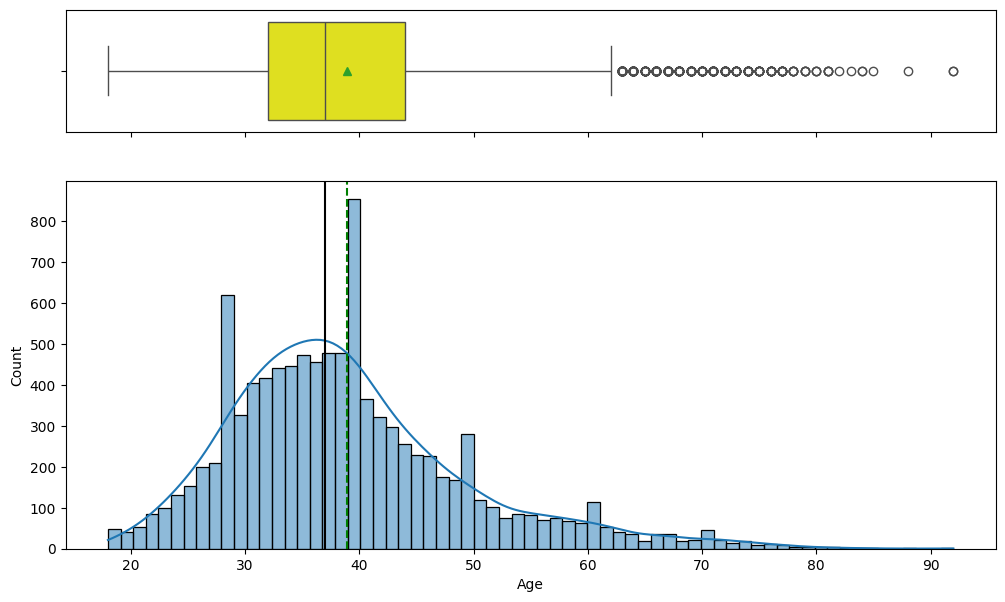

In [ ]:
histogram_boxplot(churn_df, 'Age', kde=True)

### Observations:

*  Most ages are between 30 and 50 years.

*  The distribution is slightly right-skewed, peaking around 35-40 years.

*  There are outliers above 70 years.

*   The median and mean ages are close, showing a near-symmetric core distribution.

In [ ]:
# Summary statistics for Age
summary_stats = churn_df['Age'].describe()
print("Summary Statistics for Age:")
print(summary_stats)

Summary Statistics for Age:
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [ ]:
# Outlier detection using IQR
Q1 = churn_df['Age'].quantile(0.25)
Q3 = churn_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = churn_df[(churn_df['Age'] < lower_bound) |
                                  (churn_df['Age'] > upper_bound)]
print(f"\nNumber of outliers in Age: {outliers.shape[0]}")


Number of outliers in Age: 359


## Observations

**Summary Statistics:**

*   The mean age of customers is approximately 38.92, with a standard deviation of 10.49.

*   The age range is from 18 (minimum) to 92 (maximum), with the 25th percentile at 32, 50th percentile (median) at 37, and 75th percentile at 44.

**Outliers:**

*   There are 359 outliers in the Age column, indicating that these ages fall outside the expected range based on the Interquartile Range (IQR) method.

##histogram_boxplox Visualize for Tenure

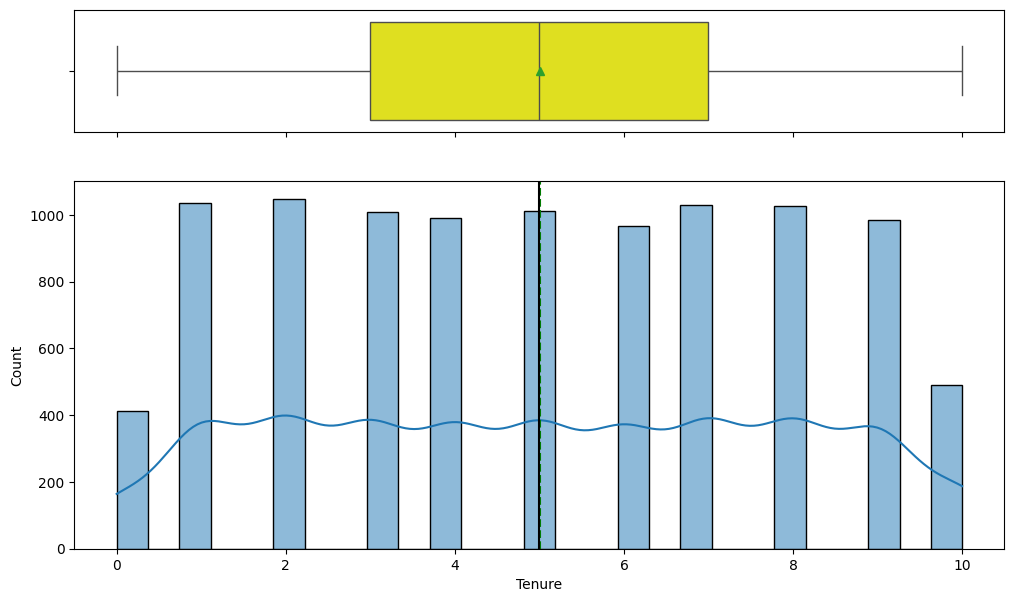

In [ ]:
histogram_boxplot(churn_df, 'Tenure', kde=True)

## Observations:

**Range and Distribution:**

*   The Tenure values range between 0 and 10.

*   The data appears to have a uniform distribution, with almost equal frequencies for most tenure values.

**Boxplot Insights:**

*   The boxplot shows that the median tenure value is close to 5.

*   The interquartile range (IQR) is between approximately 3 and 7, indicating the middle 50% of tenure values fall in this range.

*   No apparent outliers are visible in the boxplot, as all data points are within the whiskers.

**Kernel Density Estimation (KDE):**

*   The KDE overlay indicates a relatively flat density curve, further supporting the uniform distribution.

**Extremes:**

*   The histogram reveals lower counts at the extremes (e.g., 0 and 10) compared to the central values.

##histogram_boxplox Visualize for Balance

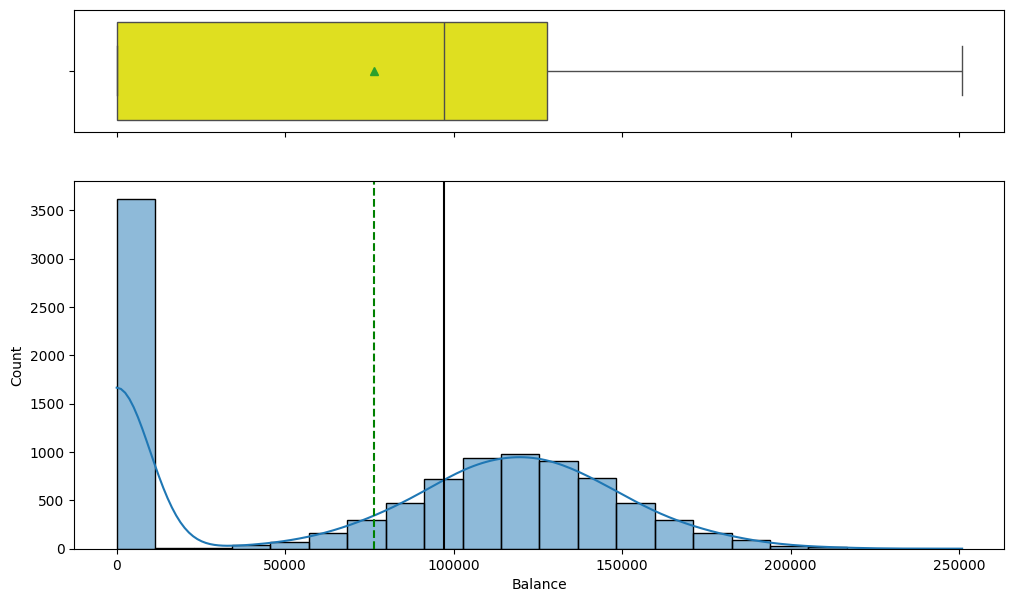

In [ ]:
histogram_boxplot(churn_df, 'Balance', kde=True)

### Observations:

**Distribution:**

*  The Balance variable is right-skewed, with a large concentration of customers having low balances (close to 0).

*  There is a noticeable tail extending toward higher balances.

**Boxplot Insights:**

*  The boxplot shows that the median balance is relatively low compared to the maximum values.

*  The interquartile range (IQR) is focused in the lower half of the balance range, suggesting most customers have balances below the median.

**Outliers:**

*   There do not appear to be significant outliers based on the whiskers, though some data points are close to the upper end of the range.

**KDE Insights:**

*  The KDE curve indicates a peak near zero, confirming the higher frequency of lower balance values.

*   Beyond the peak, the curve gradually declines as balance increases.

**Extremes:**

*  A significant number of customers have a balance of 0, as reflected in the first bar of the histogram.

*   Few customers have very high balances, extending up to approximately 250,000.

**Implications:**

*  The high number of zero-balance customers might suggest inactive accounts or customers not utilizing their credit.

*  The skewness indicates that a minority of customers maintain significantly higher balances, which could impact analysis if not normalized or transformed.

##histogram_boxplox Visualize for NumOfProducts

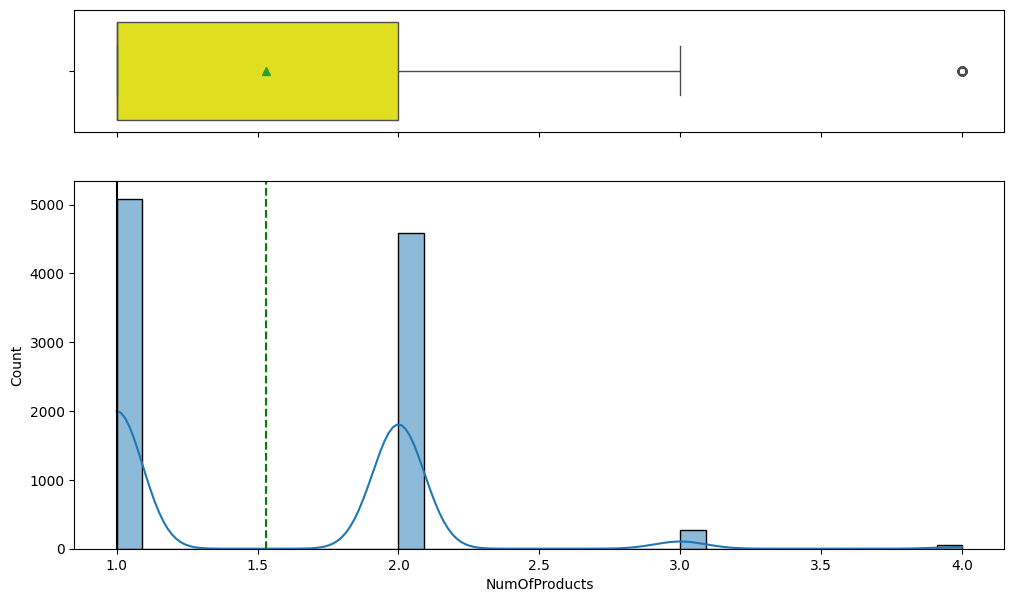

In [ ]:
histogram_boxplot(churn_df, 'NumOfProducts', kde=True)

### Observations:

**Distribution:**

*  The NumOfProducts variable shows a bimodal distribution, with peaks at 1 and 2.

*  A majority of customers have either 1 or 2 products.

* Very few customers have 3 or 4 products.

**Boxplot Insights:**

*  The median number of products is around 2, as indicated by the green triangle in the boxplot.

*  Most of the data points fall within the interquartile range (IQR), between 1 and 2 products.

*  There is an outlier at 4, as visible beyond the whiskers.

**KDE Curve:**

*  The KDE curve shows significant density around 1 and 2, confirming that these are the most common values.

*  Density drops off sharply for 3 and 4 products.

**Outliers:**

*  The outlier observed at 4 products indicates that very few customers have this many products, making it an uncommon behavior in the dataset.

##histogram_boxplox Visualize for EstimatedSalary

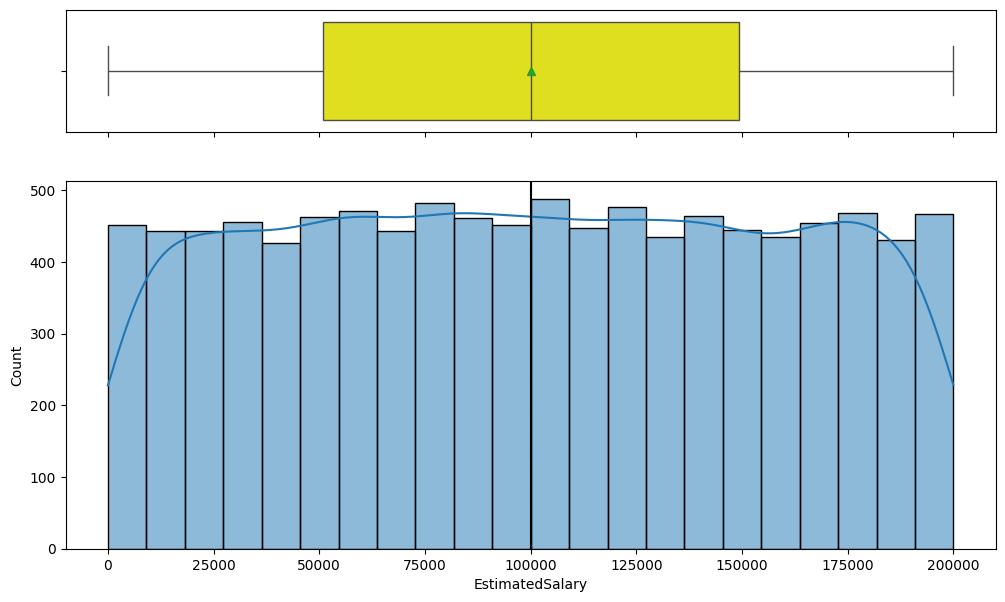

In [ ]:
histogram_boxplot(churn_df, 'EstimatedSalary', kde=True)

### Observations:

**EstimatedSalary Distribution:**

*  Uniformly distributed across the range (0 to 200,000).

*  No significant skewness or concentration in specific ranges.

**Boxplot Insights:**

*  No outliers present.

*  Median salary is approximately at the center of the distribution.

**Histogram:**

*   Bins are evenly populated, supporting uniform distribution.

*  KDE curve is relatively flat, confirming no peaks.

## labeled_barplot Visualize for Geography

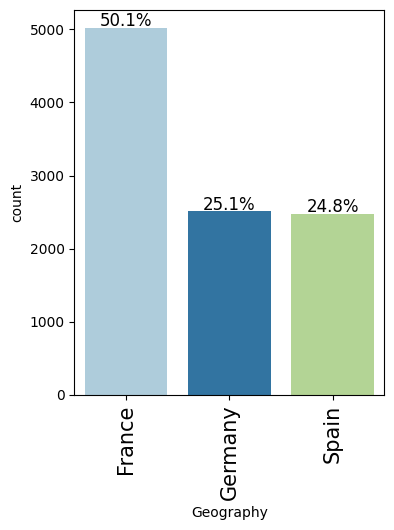

In [ ]:
labeled_barplot(churn_df, "Geography", perc=True)

### Observations:

**Geography Distribution:**

*  France has the highest representation, accounting for 50.1% of the data.
Germany and Spain have almost equal representation, with 25.1% and 24.8%, respectively.

**Balanced Classes:**

*   The distribution among Germany and Spain is balanced, but France is overrepresented compared to the other two.

##labeled_barplot Visualize for Gender

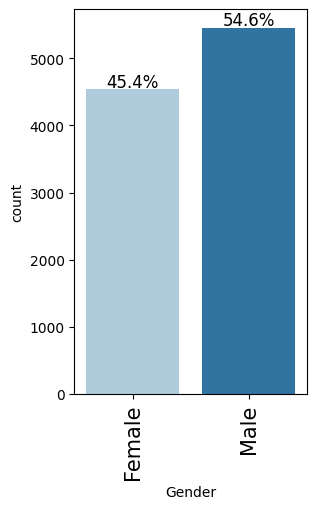

In [ ]:
labeled_barplot(churn_df, "Gender", perc=True)

### Observations:

*  The dataset has more Male customers (54.6%) compared to Female customers (45.4%).

*  The gender distribution shows a slight imbalance, which may need consideration during modeling, especially if gender impacts the target variable (e.g., churn).

##labeled_barplot Visualize for HasCrCard

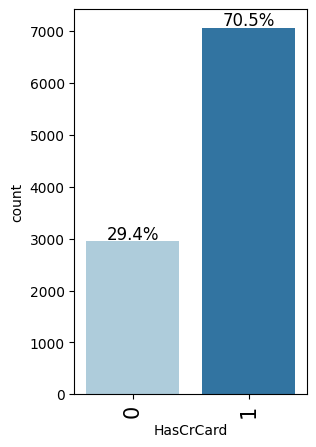

In [ ]:
labeled_barplot(churn_df, "HasCrCard", perc=True)

### Observations:

*   **Has Credit Card:** 70.5% of customers have a credit card.

*   **No Credit Card:** 29.4% of customers do not have one.

*   **Majority:** Most customers (over two-thirds) possess a credit card.

##labeled_barplot Visualize for IsActiveMember

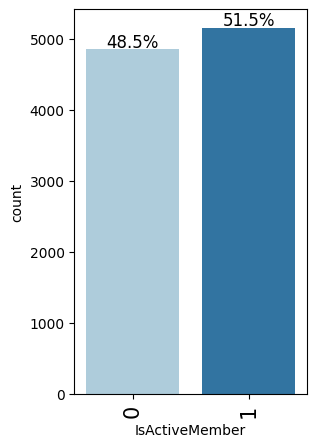

In [ ]:
labeled_barplot(churn_df, "IsActiveMember", perc=True)

### Observations:

*  **Active Members:** 51.5% of customers are active members.

*   **Inactive Members:** 48.5% are not active members.

*  **Balance:** The dataset has a nearly equal split between active and inactive members.

##labeled_barplot Visualize for NumOfProduct

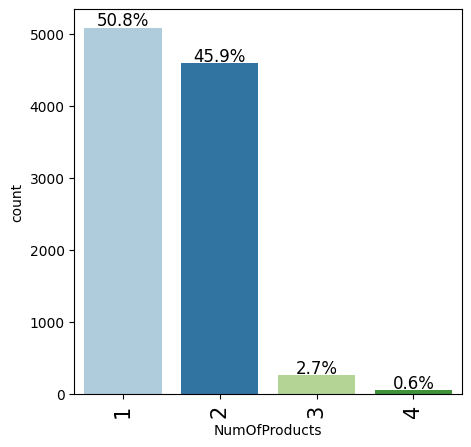

In [ ]:
# Plot a labeled bar plot for 'NumOfProducts' to see the count of each product level
labeled_barplot(churn_df, 'NumOfProducts', perc=True)

## Observations:

**Majority of Customers Have 1 or 2 Products:**

*    Most customers have either 1 or 2 products, with 50.8% having 1 product and 45.9% having 2 products. This shows that nearly all customers fall into these two categories, suggesting a high concentration of customers using only a few products.

**Low Uptake for More Products:**

*   Only a small percentage of customers have 3 products (2.7%) or 4 products (0.6%). This indicates a significant drop-off in the number of customers as the product count increases, suggesting limited adoption of multiple products among customers.

**Potential Cross-Selling Opportunity:**

*   Given the low percentages of customers with 3 or 4 products, there may be an opportunity for cross-selling additional products to customers who currently only have 1 or 2 products. This could increase customer engagement and lifetime value.

**Implications for Churn Analysis:**

*   It might be valuable to analyze whether the number of products has any correlation with churn (exit behavior). For instance, customers with only 1 product may have a higher likelihood of exiting compared to those with multiple products.

##labeled_barplot Visualize for Exited

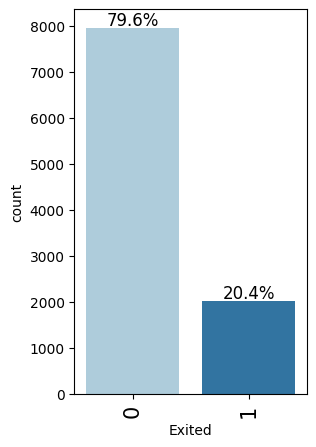

In [ ]:
# Plot a labeled bar plot for 'Exited' to see the count of each product level
labeled_barplot(churn_df, 'Exited', perc=True)

## Observations:

**Class Imbalance:**

*    The majority of customers (79.6%) have not exited, while only 20.4% have exited. This indicates a class imbalance in the dataset, with the non-exited class (0) being about four times larger than the exited class (1).

**Potential Implications for Modeling:**

*    Since the data is imbalanced, special attention may be required when building a predictive model, such as using techniques like resampling (oversampling or undersampling) or using algorithms that can handle imbalanced data. This ensures that the model does not become biased towards predicting the majority class.

**Churn Rate Insight:**

 *    The 20.4% churn rate provides insight into customer retention, as a significant portion of customers are leaving. This could be a point of interest for further analysis to identify factors that contribute to churn and implement strategies to reduce it.

### Bivariate Analysis

In [ ]:
# Define the list of numerical columns in the dataset
cols_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                  'EstimatedSalary', 'Exited']

# Compute the correlation matrix for numerical columns
corr_matrix = churn_df[cols_list].corr()

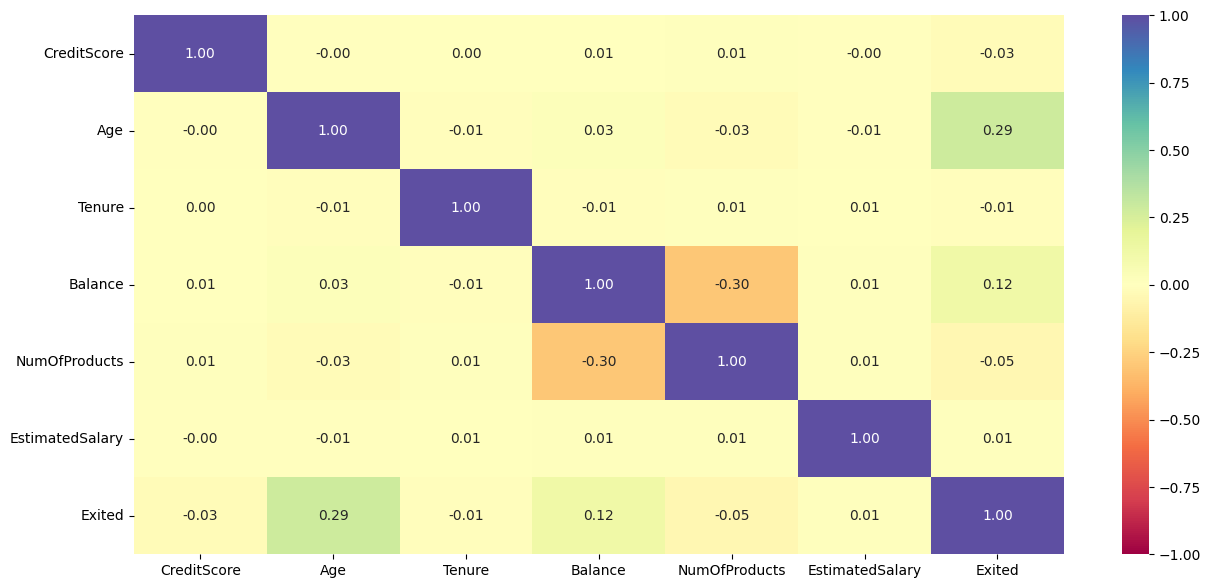

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(churn_df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Observations:

**Age and Exited:**

*   There is a moderate positive correlation (0.29) between Age and Exited, suggesting that as age increases, the likelihood of a customer exiting may increase as well.

**Balance and NumOfProducts:**

*   There is a moderate negative correlation (-0.30) between Balance and NumOfProducts, indicating that customers with higher balances tend to have fewer products with the bank.

**Other Correlations:**

*   Most other variables have very low correlations with each other, close to zero. This indicates that these features are mostly independent of each other in this dataset.

**Target Variable (Exited):**

*   Exited shows some correlation with Age (0.29) and a weaker positive correlation with Balance (0.12). However, it does not have significant correlations with other features, which could imply limited linear relationships with those features.

### create distribution_plot for Exited vs Geography

Geography  France  Germany  Spain    All
Exited                                  
All          5014     2509   2477  10000
0            4204     1695   2064   7963
1             810      814    413   2037
------------------------------------------------------------------------------------------------------------------------


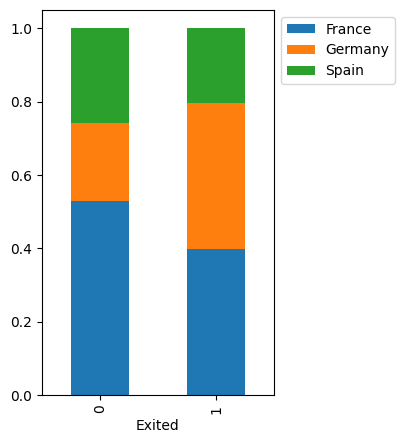

In [ ]:
# create distribution_plot for Exited vs Geography
stacked_barplot(churn_df, "Exited", "Geography")

### Observations:

**Geographic Distribution:**

*   France has the highest number of customers (5014), followed by Germany (2509) and Spain (2477).

**Non-Exiting Customers (Exited = 0):**

*   The majority of non-exiting customers are from France (4204), with Germany (1695) and Spain (2064) having fewer non-exiting customers.

**Exiting Customers (Exited = 1):**

*   Germany has the highest churn rate, with 814 exits, followed by France (810) and Spain (413).

*    Spain shows the lowest number of exits, suggesting relatively lower churn in this region.

### create distribution_plot for Exited vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


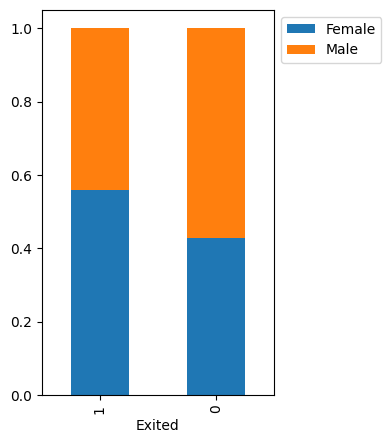

In [ ]:
stacked_barplot(churn_df, "Exited", "Gender")

### Observations:

**Overall Distribution:**

*   The total number of customers is 10,000.

*   The male and female customers are fairly evenly distributed, with 5,457 males and 4,543 females.

**Exited (Churned) Customers (1):**

*    A total of 2,037 customers have exited (churned).

**Out of the churned customers:**

*   1,139 are females.

*   898 are males.

*   This suggests a slightly higher churn rate among females compared to males.

**Non-Exited (0) Customers:**

*   A total of 7,963 customers have not exited.

*   Among these, 3,404 are females, and 4,559 are males.

*  The non-exited group is slightly more male-dominated.

###create distribution_plot for Exited vs HasCrCard

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


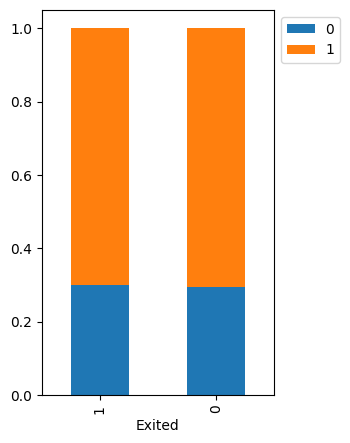

In [ ]:
stacked_barplot(churn_df, "Exited", "HasCrCard")

### Observations:

**Overall Distribution:**

*  The total number of customers is 10,000.

*  Out of these, 7,055 customers have a credit card (HasCrCard = 1), and 2,945 customers do not have a credit card (HasCrCard = 0).

**Exited (Churned) Customers (1):**

*  A total of 2,037 customers have exited.

**Out of the churned customers:**

*    613 customers do not have a credit card.

*   1,424 customers have a credit card.

*   This suggests that a higher number of customers who have a credit card have exited, indicating that credit card ownership could be correlated with higher churn.

**Non-Exited (0) Customers:**

*   A total of 7,963 customers have not exited.

*   Among these, 2,332 do not have a credit card, and 5,631 have a credit card.

*   The non-exited group has a larger proportion of customers with a credit card.

### create distribution_plot for Exited vs IsActiveMember

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


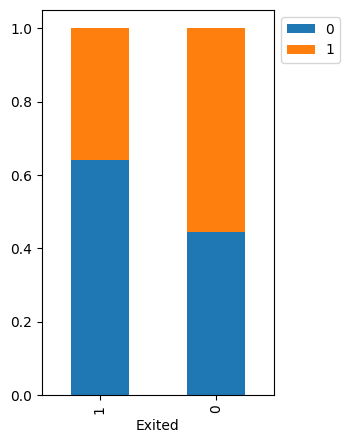

In [ ]:
stacked_barplot(churn_df, "Exited", "IsActiveMember")

### Observations:

**Overall Distribution:**

*  The total number of customers is 10,000.

*  Out of these, 5,151 customers are active members (IsActiveMember = 1), and 4,849 customers are not active members (IsActiveMember = 0).

**Exited (Churned) Customers (1):**

*  A total of 2,037 customers have exited.

**Among the churned customers:**

*   1,302 customers are not active members.

*  735 customers are active members.

*  This shows that a significantly higher number of churned customers are not active members, suggesting that inactivity is associated with a higher likelihood of exiting.

**Non-Exited (0) Customers:**

*   A total of 7,963 customers have not exited.

*   Among these, 3,547 are not active members, and 4,416 are active members.

*   The non-exited group has a larger proportion of active members.

**Key Insights:**

**Inactivity and Churn:**

*  The churn rate for non-active members is about 26.8% (1,302 out of 4,849), while the churn rate for active members is around 13.3% (735 out of 5,151).

*  This suggests that inactivity is a strong indicator of customer churn.

*  Non-active members are more likely to exit than active members.

**Customer Base:**

*  The customer base is almost evenly split between active and non-active members, but the non-active members have a higher churn rate

###Exited Vs CreditScore

CreditScore  350  351  358  359  363  365  367  373  376  382  ...  842  843  \
Exited                                                         ...             
0              0    0    0    0    0    0    0    0    0    0  ...    4    2   
All            5    1    1    1    1    1    1    1    2    1  ...    7    2   
1              5    1    1    1    1    1    1    1    2    1  ...    3    0   

CreditScore  844  845  846  847  848  849  850    All  
Exited                                                 
0              4    5    3    4    5    6  190   7963  
All            7    6    5    6    5    8  233  10000  
1              3    1    2    2    0    2   43   2037  

[3 rows x 461 columns]
------------------------------------------------------------------------------------------------------------------------


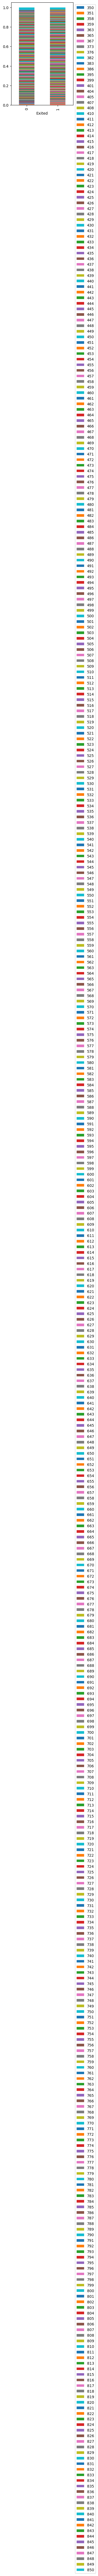

In [ ]:
stacked_barplot(churn_df, "Exited", "CreditScore")

### Observations:

**Exiting vs Non-Exiting Distribution:**

*   Non-exiting customers (Exited = 0) have a broad distribution of credit scores, with notable concentrations in the 800–850 range.

*   Exiting customers (Exited = 1) also show a similar distribution but with fewer customers in the higher credit score ranges (850).

**Higher Credit Scores:**

*   The highest concentration of exits is seen among customers with a CreditScore of 850, indicating a potential issue even with high credit scores.

**General Trends:**

*    The overall distribution across credit scores is fairly similar between exiting and non-exiting customers, though exits are slightly more concentrated in the middle of the credit score range.

CreditScore  350  351  358  359  363  365  367  373  376  382  ...  842  843  \
Gender                                                         ...             
Female         2    1    1    1    1    0    0    0    2    0  ...    3    2   
All            5    1    1    1    1    1    1    1    2    1  ...    7    2   
Male           3    0    0    0    0    1    1    1    0    1  ...    4    0   

CreditScore  844  845  846  847  848  849  850    All  
Gender                                                 
Female         3    5    4    3    1    3  109   4543  
All            7    6    5    6    5    8  233  10000  
Male           4    1    1    3    4    5  124   5457  

[3 rows x 461 columns]
------------------------------------------------------------------------------------------------------------------------


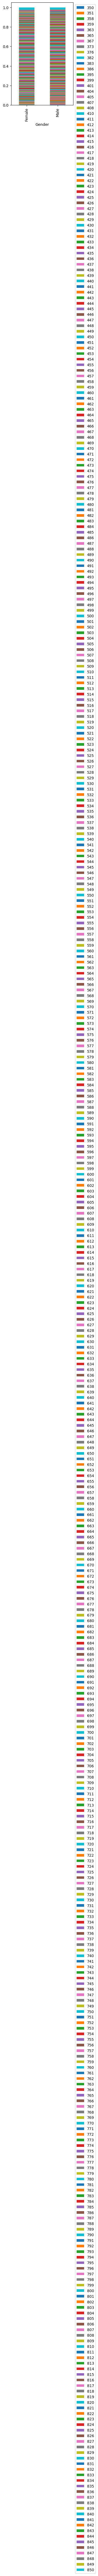

In [ ]:
stacked_barplot(churn_df, "Gender", "CreditScore")

### Observations:

**Gender Distribution:**

*   Females account for 45.43% of the dataset (4543 out of 10000).

*   Males represent 54.57% of the dataset (5457 out of 10000).

**Credit Score Distribution:**

*  Both Females and Males show similar patterns across credit scores, with the majority of individuals having scores in the 600-800 range.

*  Males have a higher concentration in the higher credit score ranges (e.g., 850), while Females are more evenly distributed across scores.

*  Males have more individuals with the highest score (850) than Females (109 vs. 124).

**Outliers:**

*   Very few individuals with a CreditScore below 400, and scores above 800 are rare.

###create distribution_plot for Exited vs Tenure

Tenure    0     1     2     3    4     5    6     7     8    9   10    All
Exited                                                                    
All     413  1035  1048  1009  989  1012  967  1028  1025  984  490  10000
0       318   803   847   796  786   803  771   851   828  771  389   7963
1        95   232   201   213  203   209  196   177   197  213  101   2037
------------------------------------------------------------------------------------------------------------------------


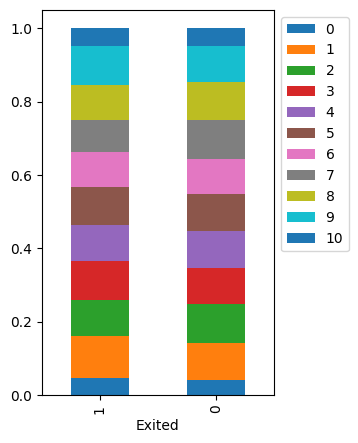

In [ ]:
stacked_barplot(churn_df, "Exited", "Tenure")

### Observations:

**Overall Distribution:**

*   Most customers have a tenure between 1 and 9 years, with the highest count in years 3–6.

*   Only 490 customers have a tenure of 10 years, and 413 have a tenure of 0 (new customers).

**Non-Exiting Customers (Exited = 0):**

*   The majority of non-exiting customers have been with the company for 1–9 years, with a slight peak in years 3–6.

*   There are fewer non-exiting customers with tenure 0 (318) and 10 years (389).

**Exiting Customers (Exited = 1):**

*   Customers with tenure between 1 and 5 years have the highest churn, especially in years 3–5.

*   The churn for new customers (tenure 0) is low (95), while it is more significant for long-term customers (tenure 10) with 101 exits.

**Churn Insights:**

*   Churn is highest among customers with 1–5 years of tenure, indicating a critical period for retention strategies.

*   Long-term customers (tenure 10) still experience notable churn, suggesting the need for loyalty programs or other retention efforts for this group.

###create distribution_plot for Exited vs NumOfProducts

NumOfProducts     1     2    3   4    All
Exited                                   
1              1409   348  220  60   2037
All            5084  4590  266  60  10000
0              3675  4242   46   0   7963
------------------------------------------------------------------------------------------------------------------------


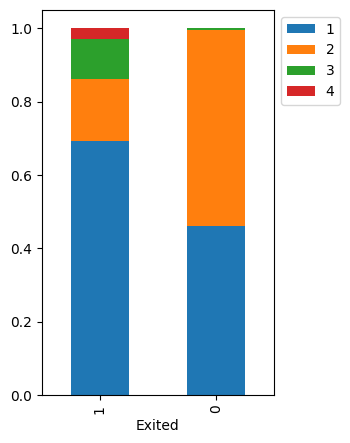

In [ ]:
stacked_barplot(churn_df, "Exited", "NumOfProducts")

### Observations:

**Churn Rate by Product Count:**

*   Customers with 1 product have the highest churn with 1,409 out of 5,084 churning (approximately 27.7%).

*   Those with 2 products also show a notable churn rate with 348 out of 4,590 churning (approximately 7.6%).

**Customers with 3 or more products have lower churn rates. Specifically:**

*   220 out of 266 with 3 products have churned (82.7%).
60 out of 60 with 4 products have churned (100%), though this group is very small.

**Customer Retention and Product Count:**

*   Most customers with 1 or 2 products tend to stay (e.g., 3,675 with 1 product, 4,242 with 2 products who haven’t exited).

*   Few customers with 3 products (46) remain, showing that customers with 3 or more products have a high likelihood of churn.

*   No customers with 4 products have stayed, indicating that those with more products may be more prone to churn despite higher engagement.

*   Churn is higher for customers with either 1 or more than 2 products.
This pattern suggests that having only one product or multiple products may increase churn, while 2 products may be the sweet spot for retention.

## Outlier detection and treatment

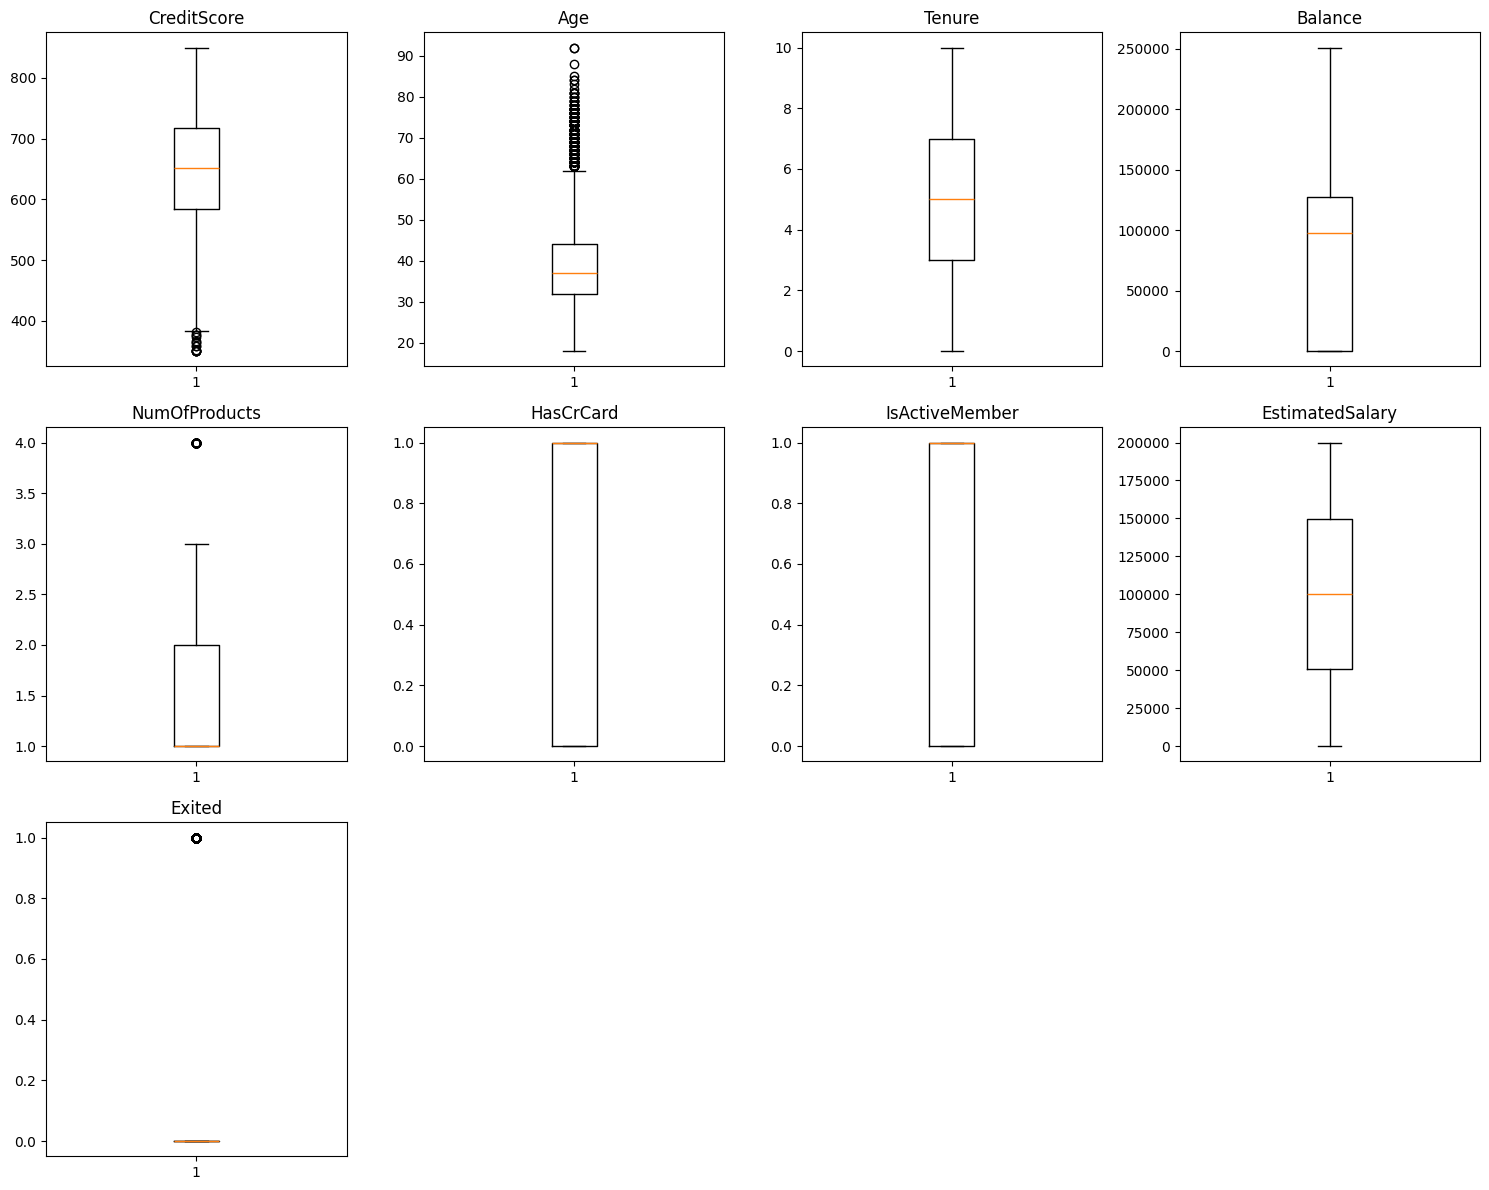

In [ ]:
# outlier detection using boxplot
numeric_columns = churn_df.select_dtypes(include=np.number).columns.tolist()

# Define the number of rows and columns dynamically
num_vars = len(numeric_columns)
num_cols = 4
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Dynamically adjust rows and columns
    plt.boxplot(churn_df[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

### Observations:

**CreditScore:**

*  Most values are within a reasonable range, but there are outliers below ~400, indicating some customers may have very low credit scores.

**Age:**

*   Outliers are present for older customers, with a majority of ages clustered between 20 and 60.

*   Some customers are aged over 70, which may need further investigation for relevance.

**Tenure:**

*   Tenure values are evenly spread across the range of 0 to 10, with no significant outliers.

**Balance:**

*    No significant outliers are present.

*   Balance distribution seems fairly uniform, with many customers having zero balance.

**NumOfProducts:**

*  Outliers are present for customers with more than 3 products.

**HasCrCard and IsActiveMember:**

*  These binary variables do not have outliers as expected.

**EstimatedSalary:**

*   Salary distribution appears uniform without significant outliers, ranging from 0 to 200,000.

**Exited:**

*  As a binary target variable, the outliers might indicate a very small proportion of customers leaving the bank.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
churn_df = pd.get_dummies(churn_df,columns=churn_df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
churn_df = churn_df.astype(float)
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Observations from the data:

**Numeric Variables:**

*   All columns have been converted to numeric format (float) after dummy variable creation.

**Dummy Variables:**

*   Categorical variables were encoded into dummy variables with drop_first=True to avoid multicollinearity.

**Example:**

*   Geography resulted in Geography_Germany and Geography_Spain (France as the reference category).

*   Gender resulted in Gender_Male (Female as the reference category).

###**Head of Data:**

**Credit Score (CreditScore):**

*    Ranges from 502.0 to 850.0.

**Age:**

*   Includes values like 39, 41, 42, and 43.

**Exited:**

*    Binary target variable indicating whether a customer exited (1.0) or remained (0.0).

**Balance:**

*   Some customers have a balance of 0.0, indicating they might not use the account for storing funds.

**Dummy Encoding:**

*    Properly added and aligned, ensuring no loss of information from categorical variables.

### Train-validation-test Split

In [ ]:
# Replace 'abc' in the Geography_Germany column with NaN
churn_df["Geography_Germany"].replace('abc', np.nan, inplace=True)

In [ ]:
churn_df["Geography_Germany"].unique()

array([0., 1.])

In [ ]:
churn_df.isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0
Geography_Germany,0


In [ ]:
# Creating an instance of the SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Define the feature set X and target variable y
X = churn_df.drop(["Exited"], axis=1)  # Replace "Exited" with your target column if different
y = churn_df["Exited"]

In [ ]:
# Splitting the dataset into the Training and Testing set
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [ ]:
# Then split the training+validation set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Observations:

**Data Cleaning:**

*  The value 'abc' in the Geography_Germany column was replaced with NaN.
No missing values were found in the dataset after replacement (isna().sum() results in all zeros).

**Unique Values:**

*  Geography_Germany column has two unique values: 0.0 and 1.0, indicating binary encoding.

**SimpleImputer:**

*   Used most_frequent strategy, likely to handle any future missing data.

**Feature and Target Separation:**

*   Features (X) were separated from the target column (Exited).

###**Data Splitting:**

**Initial Split:**

*  80% of the data (X_large, y_large) was used for training and validation.

*  20% of the data (X_test, y_test) was reserved for testing.

**Further Split:**

*  75% of X_large and y_large was used for training (X_train, y_train).

*  25% of X_large and y_large was used for validation (X_val, y_val).

**Final dataset shapes:**

**Training set:**

*    (6000, 11) features and (6000,) target.

**Validation set:**

*   (2000, 11) features and (2000,) target.

**Test set:**

*    (2000, 11) features and (2000,) target.

**Key Point:**

*  The splitting maintains the stratification of the target variable (Exited), ensuring balanced class representation across all sets.

##Missing value imputation

In [ ]:
# considering only the data points where price is not missing
churn_df = churn_df[churn_df["NumOfProducts"].notna()].copy()

# checking for missing values
churn_df.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0
Geography_Germany,0


In [ ]:
reqd_col_for_impute = ["NumOfProducts", "Gender_Male", "Geography_Germany"]  # Add more columns as needed
# Create an imputer object with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())  # Count of missing values in the training set
print("-" * 30)  # Separator line
print(X_val.isna().sum())     # Count of missing values in the validation set
print("-" * 30)  # Separator line
print(X_test.isna().sum())    # Count of missing values in the test set

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64
------------------------------
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64
------------------------------
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


### Observations:

**Missing Data Handling:**

*   Removed rows with missing NumOfProducts values, leaving no missing data in the dataset.

**Imputation:**

*   Used SimpleImputer with the most_frequent strategy for columns NumOfProducts, Gender_Male, and Geography_Germany.

**Process:**

*   Fitted the imputer on X_train and applied it separately to X_val and X_test to prevent data leakage.

**Validation:**

*  No missing values remain in any dataset (training, validation, or test).

##Encoding categorical variables

In [ ]:
churn_df.dtypes

,0
CreditScore,float64
Age,float64
Tenure,float64
Balance,float64
NumOfProducts,float64
HasCrCard,float64
IsActiveMember,float64
EstimatedSalary,float64
Exited,float64
Geography_Germany,float64


In [ ]:
# One-hot encoding the training set
X_train = pd.get_dummies(X_train, drop_first=True)

# One-hot encoding the validation set
X_val = pd.get_dummies(X_val, drop_first=True)

# One-hot encoding the test set
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
# Print the shapes of the datasets to check
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


### Observations:

**Initial Data Types:**

*   All columns were of numeric data types (float64), indicating categorical variables were already encoded or converted.

**One-Hot Encoding:**

*  Applied pd.get_dummies() with drop_first=True to avoid multicollinearity by dropping one dummy column per categorical variable.

*  This transformation was applied separately to the training, validation, and test sets to ensure consistent encoding.

**Dataset Shapes:**

*   After one-hot encoding, the shapes of the datasets remained consistent:

**Training set:**

*    (6000, 11)

**Validation set:**

*   (2000, 11)

**Test set:**

*  (2000, 11)

*  This consistency indicates no mismatch in columns across the datasets.

**Key Point:**

*  One-hot encoding was correctly implemented without altering the dataset structure or introducing inconsistencies.

In [ ]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Data Normalization

In [ ]:
# Define the list of columns to normalize
num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
             'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [ ]:
# Creating an instance of the StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the selected columns in the X_train data
scaler.fit(X_train[num_columns])

StandardScaler()

In [ ]:
# Transform the training data
X_train[num_columns] = scaler.transform(X_train[num_columns])

# Transform the validation data
X_val[num_columns] = scaler.transform(X_val[num_columns])

# Transform the test data
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8799,-2.051383,-0.469042,-0.362200,-1.233625,0.810163,0.638584,-1.016469,1.723478,0.0,0.0,1.0
2703,-1.999431,0.676865,0.675787,0.540527,-0.905072,0.638584,-1.016469,-1.659040,1.0,0.0,1.0
7074,0.317654,-0.278057,-0.016204,-0.070106,0.810163,0.638584,-1.016469,-1.101940,1.0,0.0,1.0
6445,0.286482,-0.851010,-1.400187,0.575686,-0.905072,0.638584,0.983798,1.385267,0.0,0.0,0.0
857,0.930694,0.008419,0.675787,1.075573,0.810163,-1.565964,0.983798,1.294399,0.0,1.0,1.0


### Observations:

**Columns to Normalize:**

*   'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'

**Process:**

**Scaler Initialization:**

 *  StandardScaler() is used.

**Fit:**

*   The scaler is fitted to X_train[num_columns].

**Transform:**

*  X_train[num_columns]

*  X_val[num_columns]

*  X_test[num_columns]

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Define the plotting function
def plot(history, name):
    """
    Function to plot loss or recall.

    history: Model training history containing metrics and losses.
    name: Metric to plot, 'loss' or 'recall'.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(history.history[name], label="Train")
    ax.plot(history.history[f'val_{name}'], label="Validation")
    ax.set_title(f'Model {name.capitalize()} Over Epochs')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(name.capitalize())
    ax.legend(loc='best')
    plt.show()


def model_performance_classification(model, X, y, threshold=0.5):
    # Generate predictions
    raw_predictions = model.predict(X)

    # Handle multi-dimensional predictions
    if len(raw_predictions.shape) > 1 and raw_predictions.shape[1] > 1:
        # Assuming binary classification, take the probability for the positive class
        y_pred = (raw_predictions[:, 1] > threshold).astype("int32")
    else:
        y_pred = (raw_predictions > threshold).astype("int32").ravel()  # Ensure 1D

    # Validate shapes
    if y.shape != y_pred.shape:
        raise ValueError(f"Shape mismatch: y has shape {y.shape}, but y_pred has shape {y_pred.shape}.")

    # Compute performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Store results in a dictionary
    performance = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    return pd.DataFrame([performance])


def model_performance_classification_old(model, X, y):
    # Generate predictions
    y_pred = (model.predict(X) > 0.5).astype("int32")  # Adjust threshold if necessary for binary classification

    # Compute performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Create a dictionary to store the results
    performance = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    return performance



def make_confusion_matrix(y_true, y_pred):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()





In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","regularization","train loss","validation loss","train recall","val_recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [ ]:
# Define the list of metrics
metrics = [
    tf.keras.metrics.Accuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall")
]

#NN with SGD (learning_rate=0.001, momentum=0.9)

# Model_0

In [ ]:
tf.keras.backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))


In [ ]:
# Using SGD as the optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
metric = tf.keras.metrics.Recall()
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set epochs and batch size
epochs = 25
batch_size = 32

In [ ]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5857 - recall: 0.1407 - val_loss: 0.4705 - val_recall: 0.0000e+00
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4706 - recall: 9.6172e-04 - val_loss: 0.4468 - val_recall: 0.0229
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4487 - recall: 0.0188 - val_loss: 0.4336 - val_recall: 0.0483
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4356 - recall: 0.0788 - val_loss: 0.4250 - val_recall: 0.1094
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4270 - recall: 0.1582 - val_loss: 0.4187 - val_recall: 0.1628
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4206 - recall: 0.2088 - val_loss: 0.4134 - val_recall: 0.2010
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4152 - recall: 0.2501 - val_loss: 0.4085 - val_recall: 0.2239
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4104 - recall: 0.2710 - val_loss: 0.4037 - val_recall: 0.2443


In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.38551115989685


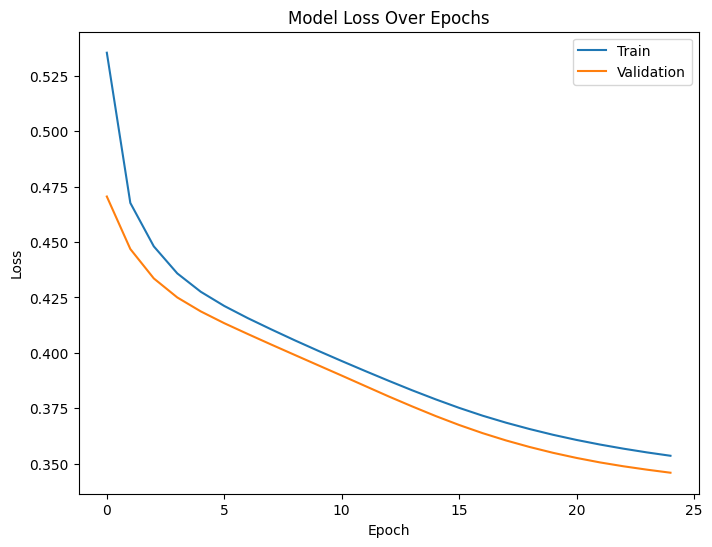

In [ ]:
# Plot training and validation loss
plot(history, 'loss')

In [ ]:
# After fitting the model
print(history.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


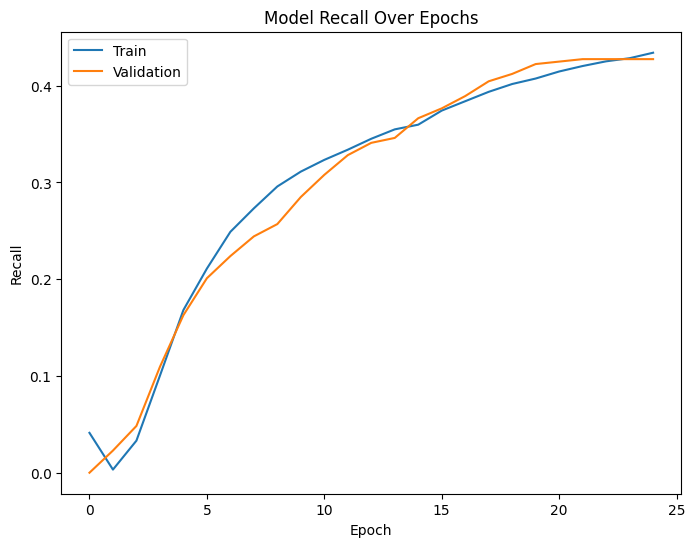

In [ ]:
# Plot training and validation recall
plot(history, 'recall')

In [ ]:
results.loc[0] = [2,[64,32],["relu"],25,32,"sgd",[0.001, "0.9"],"-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39


In [ ]:
# Make predictions on the training set and apply threshold
y_train_pred = model_0.predict(X_train) > 0.5
y_train_pred = y_train_pred.astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Make predictions on the validation set and apply threshold
y_val_pred = model_0.predict(X_val) > 0.5
y_val_pred = y_val_pred.astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Model name for identification
model_name ="NN with SGD (learning_rate=0.001, momentum=0.4)"

In [ ]:
# Evaluate model performance using the corrected model variable
model_0_performance_train_metric = model_performance_classification(model_0, X_train, y_train)
print(model_0_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0  0.855333   0.760962  0.434923  0.553498


In [ ]:
# Evaluate model performance using the corrected model variable and feature set
model_0_performance_val_metric = model_performance_classification(model_0, X_val, y_val)
print(model_0_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8605   0.756757  0.427481  0.546341


In [ ]:
# Generate the confusion matrix for the training set
model_0_conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Set Confusion Matrix:\n", model_0_conf_matrix_train)

Training Set Confusion Matrix:
 [[4594  169]
 [ 699  538]]


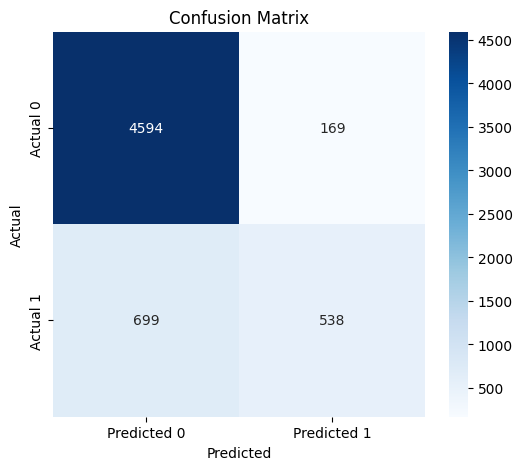

In [ ]:
# Use the function to plot the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

In [ ]:
# Generate the confusion matrix for the validation set
model_0_conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Validation Set Confusion Matrix:\n", model_0_conf_matrix_val)

Validation Set Confusion Matrix:
 [[1553   54]
 [ 225  168]]


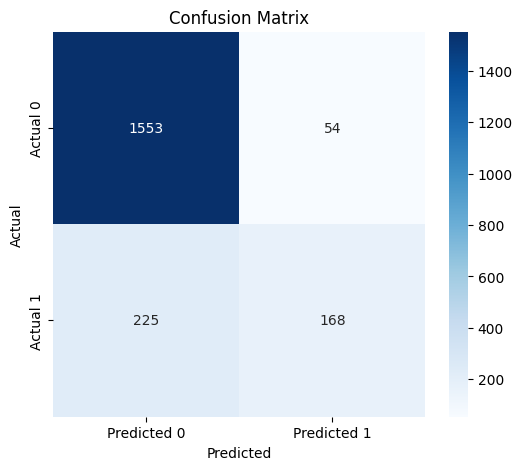

In [ ]:
# Use the function to plot the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

#NN with SGD (learning_rate=0.001, momentum=0.4)

# Model_1

In [ ]:
tf.keras.backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
# Using SGD as the optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.4)
metric = tf.keras.metrics.Recall()
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set epochs and batch size
epochs = 25
batch_size = 32

In [ ]:
start = time.time()
history_0 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6450 - recall: 0.2760 - val_loss: 0.5722 - val_recall: 0.0051
Epoch 2/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5625 - recall: 0.0052 - val_loss: 0.5244 - val_recall: 0.0000e+00
Epoch 3/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5231 - recall: 0.0000e+00 - val_loss: 0.4999 - val_recall: 0.0000e+00
Epoch 4/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5025 - recall: 0.0000e+00 - val_loss: 0.4858 - val_recall: 0.0000e+00
Epoch 5/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4902 - recall: 0.0000e+00 - val_loss: 0.4766 - val_recall: 0.0000e+00
Epoch 6/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4819 - recall: 0.0000e+00 - val_loss: 0.4699 - val_recall: 0.0000e+00
Epoch 7/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4754 - recall: 0.0000e+00 - val_loss: 0.4645 - val_recall: 0.0000e+00
Epoch 8/25
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4701 - recall: 0.0000e+00 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.193004846572876


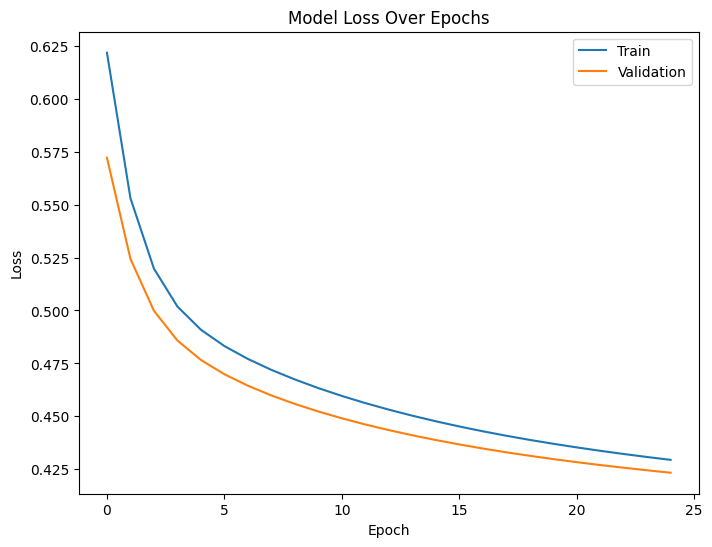

In [ ]:
# Plot training and validation loss
plot(history_0, 'loss')

In [ ]:
# After fitting the model
print(history_0.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


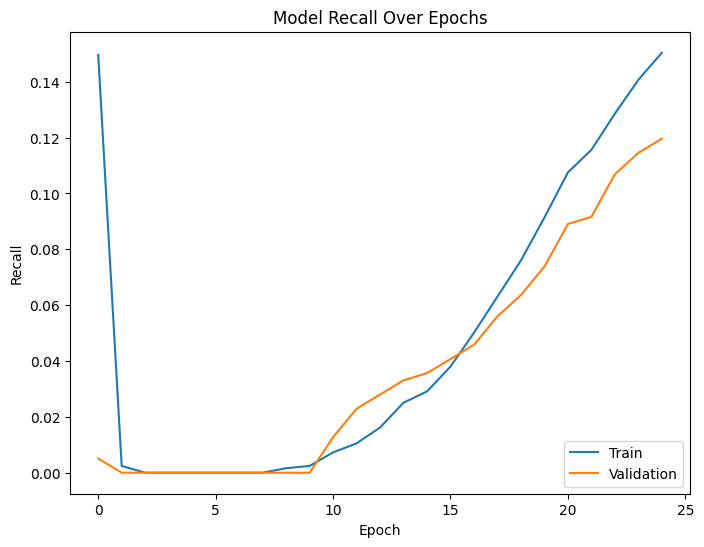

In [ ]:
# Plot training and validation recall
plot(history_0, 'recall')

In [ ]:
results.loc[1] = [2,[64,32],["relu"],25,32,"sgd",[0.001, "0.4"],"-",history_0.history["loss"][-1],history_0.history["val_loss"][-1],history_0.history["recall"][-1],history_0.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19


In [ ]:
# Make predictions on the training set and apply threshold
y_train_pred = model_1.predict(X_train) > 0.5
y_train_pred = y_train_pred.astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Make predictions on the validation set and apply threshold
y_val_pred = model_1.predict(X_val) > 0.5
y_val_pred = y_val_pred.astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Model name for identification
model_name ="NN with SGD (learning_rate=0.001, momentum=0.4)"

## Classification report for the training validation set

In [ ]:
# Evaluate model performance using the corrected model variable
model_1_performance_train_metric = model_performance_classification(model_1, X_train, y_train)
print(model_1_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8165   0.769841  0.156831  0.260578


In [ ]:
# Evaluate model performance using the corrected model variable and feature set
model_1_performance_val_metric = model_performance_classification(model_1, X_val, y_val)
print(model_1_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8135   0.635135  0.119593  0.201285


## confusion matrix for the training validation set

In [ ]:
# Generate the confusion matrix for the training set
model_1_conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Set Confusion Matrix:\n", model_1_conf_matrix_train)

Training Set Confusion Matrix:
 [[4705   58]
 [1043  194]]


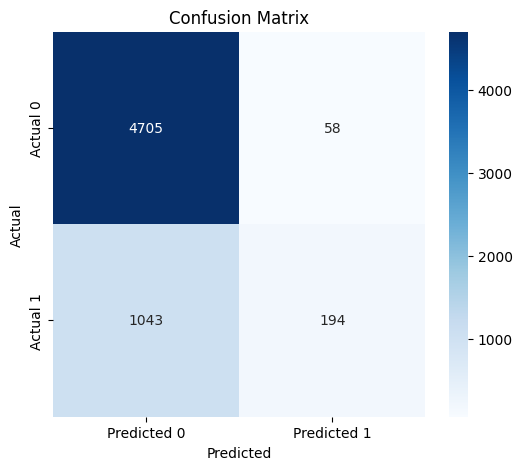

In [ ]:
# Use the function to plot the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

In [ ]:
# Generate the confusion matrix for the validation set
model_1_conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Validation Set Confusion Matrix:\n", model_1_conf_matrix_val)

Validation Set Confusion Matrix:
 [[1580   27]
 [ 346   47]]


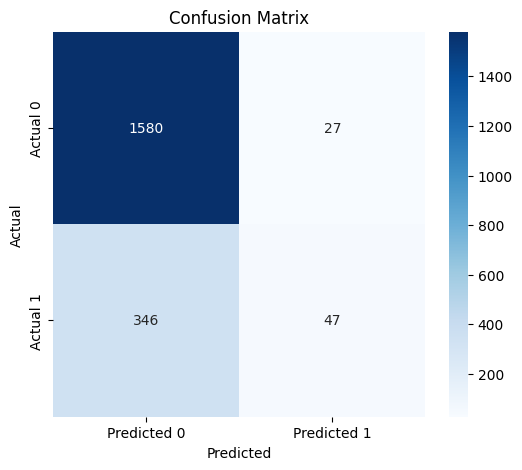

In [ ]:
# Use the function to plot the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

# Neural Network with SGD (learning_rate=0.001)

# Model_2

In [ ]:
# Fixing the seed for reproducibility
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))


In [ ]:
# Using SGD as the optimizer with a learning rate of 0.001
optimizer = SGD(learning_rate=0.001)
metric = tf.keras.metrics.Recall()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Print the model summary
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set epochs and batch size
epochs = 50
batch_size = 32

In [ ]:
start = time.time()
# Fitting the ANN
start = time.time()
history_1= model_2.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6554 - recall: 0.3323 - val_loss: 0.6035 - val_recall: 0.0687
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5947 - recall: 0.0552 - val_loss: 0.5596 - val_recall: 0.0025
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5565 - recall: 4.7663e-04 - val_loss: 0.5314 - val_recall: 0.0000e+00
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5319 - recall: 0.0000e+00 - val_loss: 0.5127 - val_recall: 0.0000e+00
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5154 - recall: 0.0000e+00 - val_loss: 0.4999 - val_recall: 0.0000e+00
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5039 - recall: 0.0000e+00 - val_loss: 0.4906 - val_recall: 0.0000e+00
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4955 - recall: 0.0000e+00 - val_loss: 0.4837 - val_recall: 0.0000e+00
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4892 - recall: 0.0000e+00 - va

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.98363280296326


###Plot the training and validation visualation

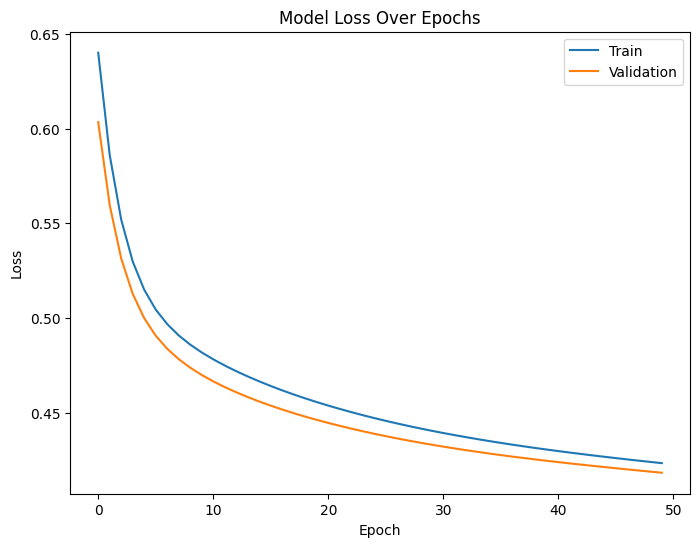

In [ ]:
# Plot training and validation loss
plot(history_1, 'loss')

### Plotting Train recall vs Validation recall visualation

In [ ]:
# After fitting the model
print(history_1.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


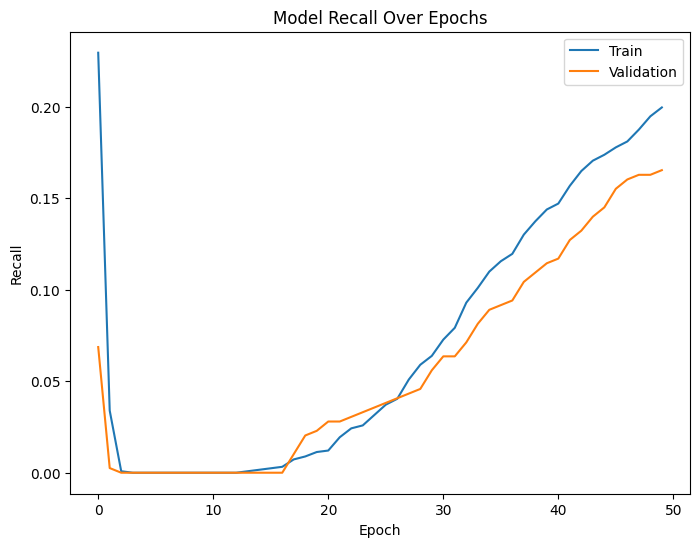

In [ ]:
# Plot training and validation recall
plot(history_1, 'recall')

In [ ]:
results.loc[2] = [2,[64,32],["relu","relu"],50,32,"sgd",[0.001, "-"],"-",history_1.history["loss"][-1],history_1.history["val_loss"][-1],history_1.history["recall"][-1],history_1.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19
2,2,"[64, 32]","[relu, relu]",50,32,sgd,"[0.001, -]",-,0.423253,0.418190,0.199677,0.165394,36.98


### Model Performance on the Training Set

 ### Making Predictions on the Training and Validation Sets

In [ ]:
print("y_train shape:", y_train.shape)
print("y_train_pred shape:", y_train_pred.shape)

y_train shape: (6000,)
y_train_pred shape: (6000, 1)


In [ ]:
# Predicting the results using best threshold on training set
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Predicting the results using best threshold on validation set
y_val_pred = model_0.predict(X_val)  # Complete the code with X_val
y_val_pred = (y_val_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Model name

In [ ]:
# Model name for identification
model_name = "NN with SGD (learning_rate=0.001)"

### Classification report for the training & val set

In [ ]:
# Evaluate model performance using the corrected model variable
model_2_performance_train_metric = model_performance_classification(model_2, X_train, y_train)
print(model_2_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0  0.821667   0.750751  0.202102  0.318471


In [ ]:
# Evaluate model performance using the corrected model variable and feature set
model_2_performance_val_metric = model_performance_classification(model_2, X_val, y_val)
print(model_2_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8175   0.637255  0.165394  0.262626


###Confusion matrix

### Generate the confusion matrix for the train & val set

In [ ]:
# Generate the confusion matrix for the training set
model_2_conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Set Confusion Matrix:\n", model_2_conf_matrix_train)

Training Set Confusion Matrix:
 [[4594  169]
 [ 699  538]]


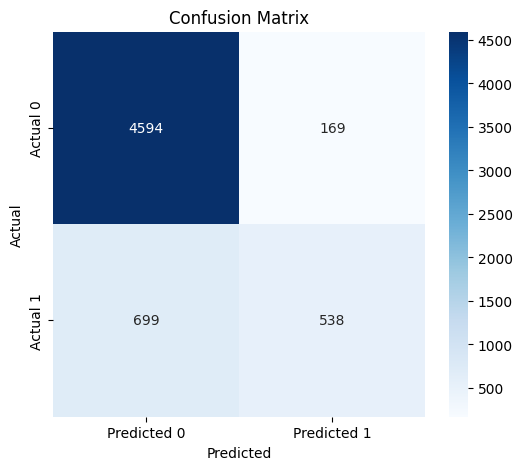

In [ ]:
# Use the function to plot the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

In [ ]:
# Generate the confusion matrix for the validation set
model_2_conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Validation Set Confusion Matrix:\n", model_2_conf_matrix_val)

Validation Set Confusion Matrix:
 [[1553   54]
 [ 225  168]]


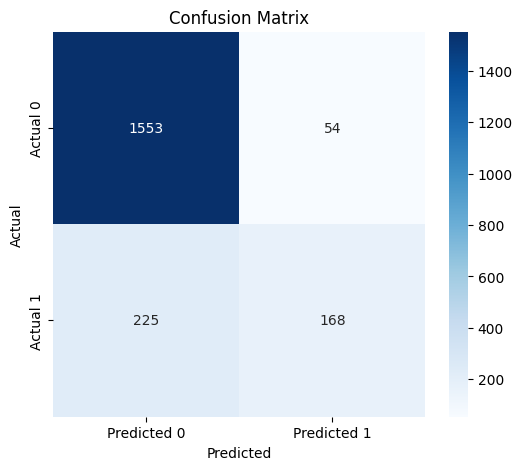

In [ ]:
# Use the function to plot the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam



# Model_3

In [ ]:
# Clear any previous models from memory
backend.clear_session()

# Fixing the seed for reproducibility
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()

# Uncomment one of the following lines to define the metric to be used
metric = tf.keras.metrics.Recall()

# Compiling the model with binary cross-entropy loss and recall as the metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Summarizing the model architecture
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training configuration
epochs = 50
batch_size = 32

In [ ]:
start = time.time()
history_2 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4695 - recall: 0.1044 - val_loss: 0.4065 - val_recall: 0.2901
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4042 - recall: 0.3029 - val_loss: 0.3747 - val_recall: 0.3766
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3771 - recall: 0.3766 - val_loss: 0.3539 - val_recall: 0.4275
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3617 - recall: 0.4037 - val_loss: 0.3452 - val_recall: 0.4351
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3545 - recall: 0.4155 - val_loss: 0.3414 - val_recall: 0.4300
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3503 - recall: 0.4332 - val_loss: 0.3391 - val_recall: 0.4249
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3471 - recall: 0.4374 - val_loss: 0.3374 - val_recall: 0.4249
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3445 - recall: 0.4372 - val_loss: 0.3363 - val_recall: 0.4249
Epoch 9/

In [ ]:
print("Time taken in seconds:", end - start)

Time taken in seconds: 37.87709403038025


## Plot training and validation loss

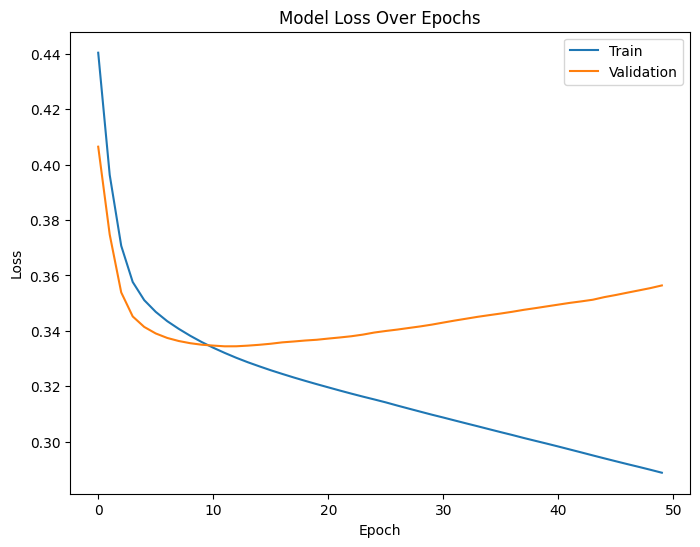

In [ ]:
# Plot training and validation loss
plot(history_2, 'loss')

## Plot training and validation recall

In [ ]:
# After fitting the model
print(history_2.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


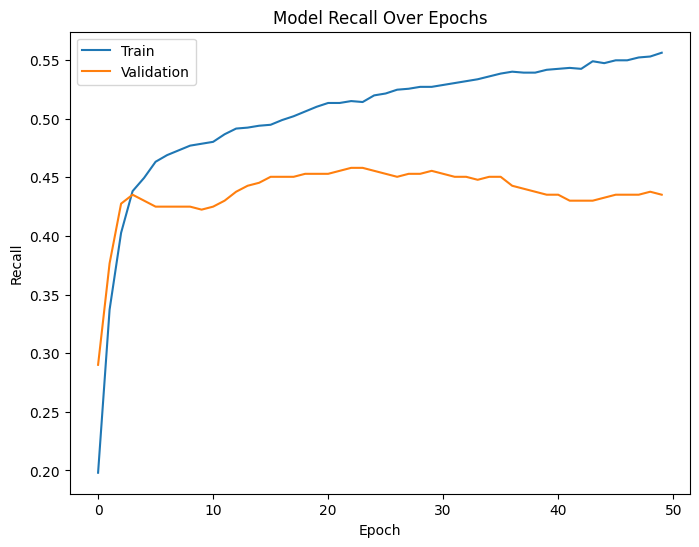

In [ ]:
plot(history_2, 'recall')

In [ ]:
results.loc[3] = [2,[64,32],["relu","tanh"],50,32,"adam",[0.001, "-"],"-",history_2.history["loss"][-1],history_2.history["val_loss"][-1],history_2.history["recall"][-1],history_2.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19
2,2,"[64, 32]","[relu, relu]",50,32,sgd,"[0.001, -]",-,0.423253,0.418190,0.199677,0.165394,36.98
3,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",-,0.288793,0.356381,0.556184,0.435115,37.88


### predictions on the training set and apply threshold

In [ ]:
# Predicting the results using 0.5 as the threshold
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)  # Convert boolean to int for compatibility with recall_score

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Define model name

In [ ]:
# Define the model name
model_name = "NN with Adam"

##Classification train vs validation set

In [ ]:
# Evaluate model performance using the corrected model variable
model_3_performance_train_metric = model_performance_classification(model_3, X_train, y_train)
print(model_3_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8815   0.836317  0.528698  0.647845


In [ ]:
 # Evaluate model performance using the corrected model variable and feature set
model_3_performance_val_metric = model_performance_classification(model_3, X_val, y_val)
print(model_3_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8515   0.695122  0.435115  0.535211



## Calculate the confusion matrix train

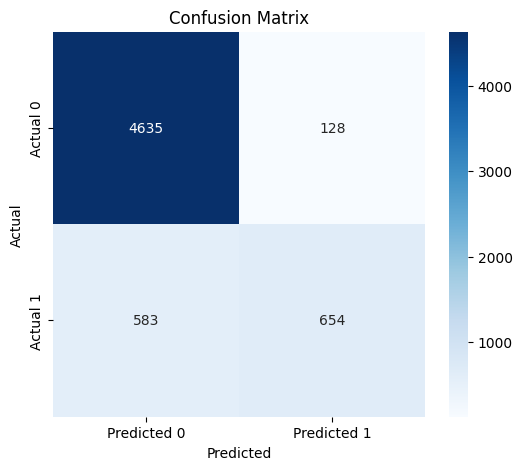

In [ ]:
# Confusion matrix for training set
make_confusion_matrix(y_train, y_train_pred)

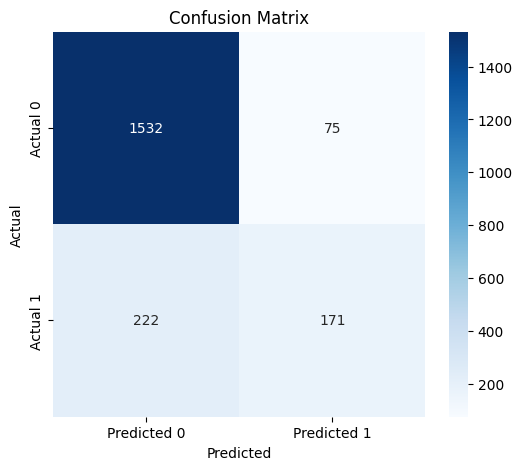

In [ ]:
# Confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

# Neural Network with Adam Optimizer and Dropout



## Model_4

In [ ]:
# Clearing the session to avoid clutter from old models
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network model
model_4 = Sequential()
# Adding the input layer with 32 neurons and ReLU activation function
model_4.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
# Adding Dropout with a ratio of 0.2 (or any other suitable value)
model_4.add(Dropout(0.2))
# Adding the first hidden layer with 64 neurons and ReLU activation
model_4.add(Dense(64, activation='tanh'))
# Adding the second hidden layer with 32 neurons and ReLU activation
model_4.add(Dense(32, activation='relu'))
# Adding Dropout with a ratio of 0.1 (or any other suitable value)
model_4.add(Dropout(0.1))
# Adding the third hidden layer with 16 neurons and ReLU activation
model_4.add(Dense(16, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid activation (for binary classification)
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# Use Adam optimizer (without momentum)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Define the metric (Recall)
metric = tf.keras.metrics.Recall()
# Compile the model with binary crossentropy loss and the Recall metric
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=50
batch_size=32

In [ ]:
start = time.time()
history_3 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5026 - recall: 0.1006 - val_loss: 0.4184 - val_recall: 0.1705
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4290 - recall: 0.2073 - val_loss: 0.3859 - val_recall: 0.3359
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4041 - recall: 0.3341 - val_loss: 0.3577 - val_recall: 0.4097
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3864 - recall: 0.3569 - val_loss: 0.3483 - val_recall: 0.4148
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3798 - recall: 0.3731 - val_loss: 0.3448 - val_recall: 0.4224
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3661 - recall: 0.3958 - val_loss: 0.3401 - val_recall: 0.4606
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3703 - recall: 0.4062 - val_loss: 0.3394 - val_recall: 0.4707
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3633 - recall: 0.4262 - val_loss: 0.3386 - val_recall: 0.4453
Epoch 9/

In [ ]:
# Print the training time
print("Training Time:", end - start, "seconds")

Training Time: 55.52262997627258 seconds


## Plot training and validation loss

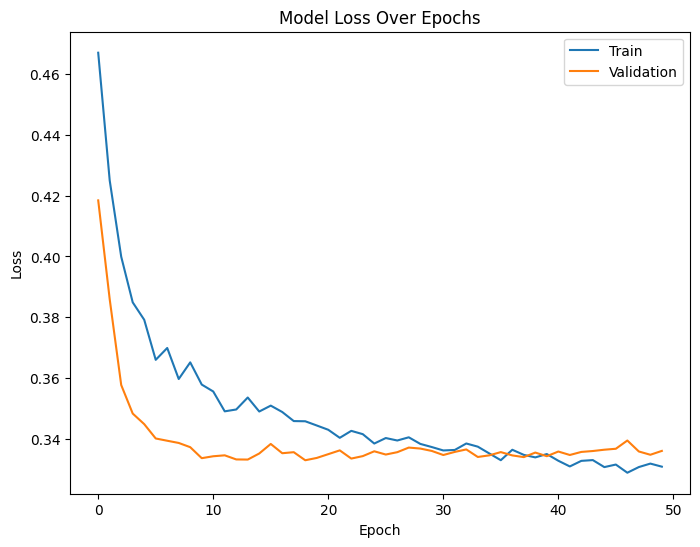

In [ ]:
plot(history_3, 'loss')

##Plot training and validation recall

In [ ]:
# After fitting the model
print(history_3.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


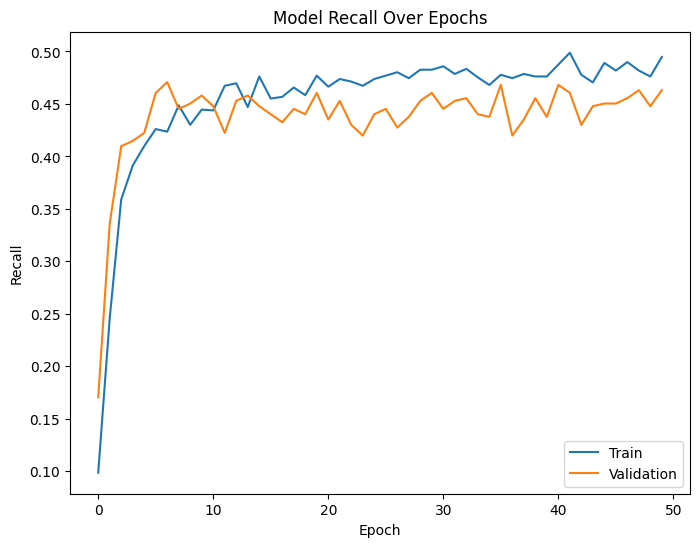

In [ ]:
plot(history_3, 'recall')

In [ ]:
results.loc[4] = [2,[64,32],["relu","tanh"],50,32,"adam",[0.001, "-"],"dropout (0.2)",history_3.history["loss"][-1],history_3.history["val_loss"][-1],history_3.history["recall"][-1],history_3.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19
2,2,"[64, 32]","[relu, relu]",50,32,sgd,"[0.001, -]",-,0.423253,0.418190,0.199677,0.165394,36.98
3,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",-,0.288793,0.356381,0.556184,0.435115,37.88
4,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",dropout (0.2),0.330846,0.336032,0.494745,0.463104,55.52


In [ ]:
# Predicting the results using 0.5 as the threshold for train and validation sets
y_train_pred = model_4.predict(X_train)
y_train_pred = (y_train_pred > 0.5)  # Apply threshold


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)  # Apply threshold

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
model_name = "NN with Adam & Dropout"

## Classification report for the training and val

In [ ]:
# Evaluate model performance using the corrected model variable
model_4_performance_train_metric = model_performance_classification(model_4, X_train, y_train)
print(model_4_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0     0.874   0.792935  0.526273  0.632653


In [ ]:
# Evaluate model performance using the corrected model variable and feature set
model_4_performance_val_metric = model_performance_classification(model_4, X_val, y_val)
print(model_4_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8565   0.705426  0.463104   0.55914


##  confusion matrix train and val


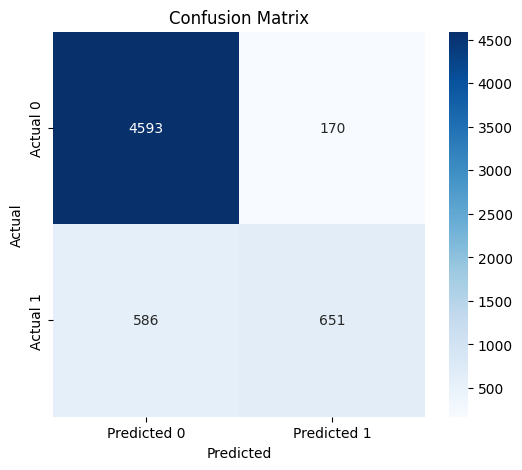

In [ ]:
# Confusion matrix for training set
make_confusion_matrix(y_train, y_train_pred)

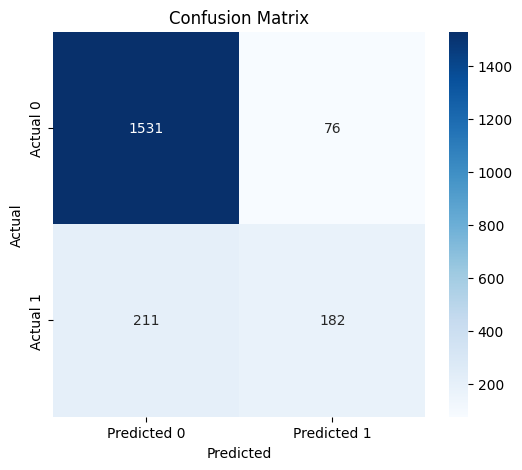

In [ ]:
# Confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

# Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer





# Model_5

In [ ]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)

# Fit SMOTE on the training data and resample
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))


After UpSampling, the shape of train_X: (9526, 11)
After UpSampling, the shape of train_y: (9526,) 



In [ ]:
# Clear the backend session
backend.clear_session()
# Fix the random seed for reproducibility
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initialize the neural network model
model_5 = Sequential()

# Add an input layer
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Add hidden layers
model_5.add(Dense(32, activation='tanh'))
model_5.add(Dense(16, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model_5.add(Dense(1, activation='sigmoid'))


In [ ]:
# Initialize the SGD optimizer with a learning rate of 0.001
optimizer = SGD(learning_rate=0.001)

# Define the metric to be used
metric = Recall()

# Compile the model with binary cross-entropy as the loss function and recall as the metric
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Summarize the model architecture
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=50
batch_size=32

In [ ]:
start = time.time()
history_4 = model_5.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7027 - recall: 0.7180 - val_loss: 0.6485 - val_recall: 0.5038
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6383 - recall: 0.4400 - val_loss: 0.5978 - val_recall: 0.2621
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5930 - recall: 0.2087 - val_loss: 0.5603 - val_recall: 0.0992
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5593 - recall: 0.0884 - val_loss: 0.5317 - val_recall: 0.0483
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5338 - recall: 0.0289 - val_loss: 0.5102 - val_recall: 0.0254
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5147 - recall: 0.0102 - val_loss: 0.4942 - val_recall: 0.0229
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5006 - recall: 0.0074 - val_loss: 0.4824 - val_recall: 0.0127
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4902 - recall: 0.0053 - val_loss: 0.4737 - val_recall: 0.0051
Epoch 9/

In [ ]:
# Print the training time
print("Training Time:", end - start, "seconds")

Training Time: 37.618106842041016 seconds


##Plot training and validation loss

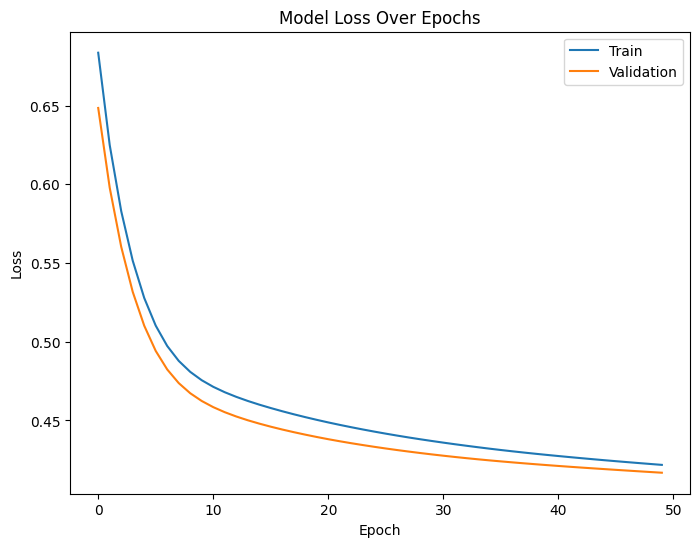

In [ ]:
plot(history_4, 'loss')

 ## Plot training and validation recall

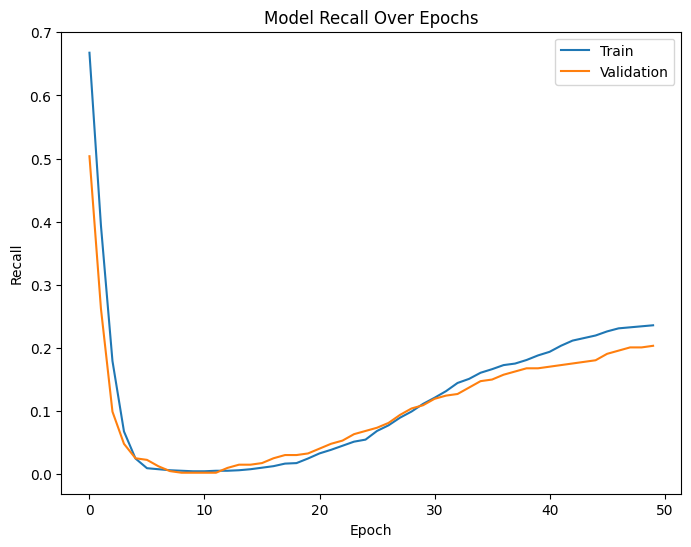

In [ ]:
plot(history_4, 'recall')

In [ ]:
# After fitting the model
print(history_4.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


In [ ]:
results.loc[5] = [2,[64,32],["relu","tanh"],50,32,"sgd",[0.001, "_"],"-",history_4.history["loss"][-1],history_4.history["val_loss"][-1],history_4.history["recall"][-1],history_4.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19
2,2,"[64, 32]","[relu, relu]",50,32,sgd,"[0.001, -]",-,0.423253,0.418190,0.199677,0.165394,36.98
3,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",-,0.288793,0.356381,0.556184,0.435115,37.88
4,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",dropout (0.2),0.330846,0.336032,0.494745,0.463104,55.52
5,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.001, _]",-,0.421783,0.416799,0.236055,0.203562,37.62


### Predicting the results on the training vs Val set

In [ ]:
# Predicting the results using 0.5 as the threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Predicting the results for the validation set using 0.5 as the threshold
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 ### model_name

In [ ]:
# Define model name
model_name = "NN with SMOTE & SGD"

##classification report for the training and val set

In [ ]:
# Evaluate model performance using the corrected model variable
model_5_performance_train_metric = model_performance_classification(model_5, X_train, y_train)
print(model_5_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0  0.823833   0.718447  0.239289  0.359005


In [ ]:
 # Evaluate model performance using the corrected model variable and feature set
model_5_performance_val_metric = model_performance_classification(model_5, X_val, y_val)
print(model_5_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Accuracy  Precision    Recall  F1 Score
0      0.82   0.629921  0.203562  0.307692


### confusion matrix for the training and val set

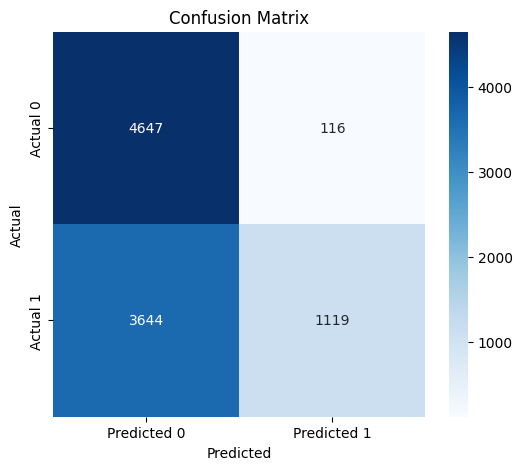

In [ ]:
# Confusion matrix for the training set
make_confusion_matrix(y_train_smote, y_train_pred)

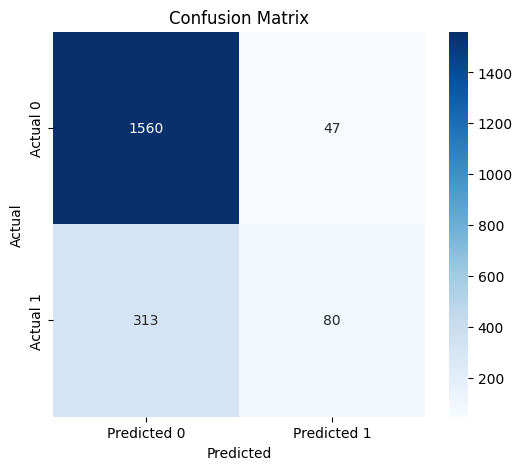

In [ ]:
# Confusion matrix for the validation set
make_confusion_matrix(y_val, y_val_pred)

# Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer  

# Model_6

In [ ]:
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_6 = Sequential()

# Add the input layer (specify the number of neurons and activation function)
model_6.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))  # 64 neurons in input layer

# Add the first hidden layer (specify the number of neurons and activation function)
model_6.add(Dense(32, activation='tanh'))  # 64 neurons in the first hidden layer

# Add the second hidden layer (specify the number of neurons and activation function)
model_6.add(Dense(16, activation='relu'))  # 32 neurons in the second hidden layer

# Add the output layer (1 neuron for binary classification with a sigmoid activation function)
model_6.add(Dense(1, activation='sigmoid'))

In [ ]:
# Use Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define Recall as the metric
metric = tf.keras.metrics.Recall()

# Compile the model with binary crossentropy loss and Recall as the metric
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_6.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=50
batch_size=32

In [ ]:
start = time.time()
history_5 = model_6.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5081 - recall_1: 0.1903 - val_loss: 0.4054 - val_recall_1: 0.3053
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3973 - recall_1: 0.3402 - val_loss: 0.3594 - val_recall_1: 0.4326
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3643 - recall_1: 0.3970 - val_loss: 0.3440 - val_recall_1: 0.4351
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3537 - recall_1: 0.4144 - val_loss: 0.3393 - val_recall_1: 0.4453
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3481 - recall_1: 0.4295 - val_loss: 0.3371 - val_recall_1: 0.4427
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3443 - recall_1: 0.4436 - val_loss: 0.3357 - val_recall_1: 0.4478
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3413 - recall_1: 0.4545 - val_loss: 0.3349 - val_recall_1: 0.4478
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3389 - recall_1: 0.4569 - val_loss: 0.3344

In [ ]:
print(f"Training time: {end - start} seconds")

Training time: 42.83720874786377 seconds


In [ ]:
# After fitting the model
print(history_5.history.keys())

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])


## Plot training and validation loss

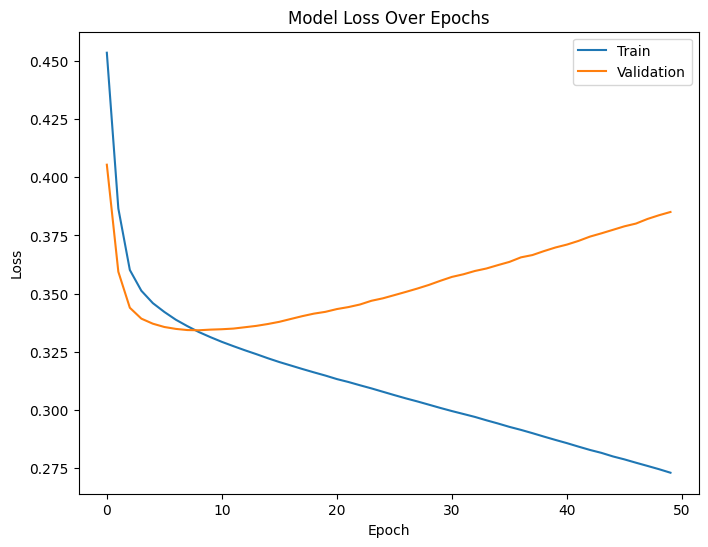

In [ ]:
plot(history_5, 'loss')

## Plot training and validation recall

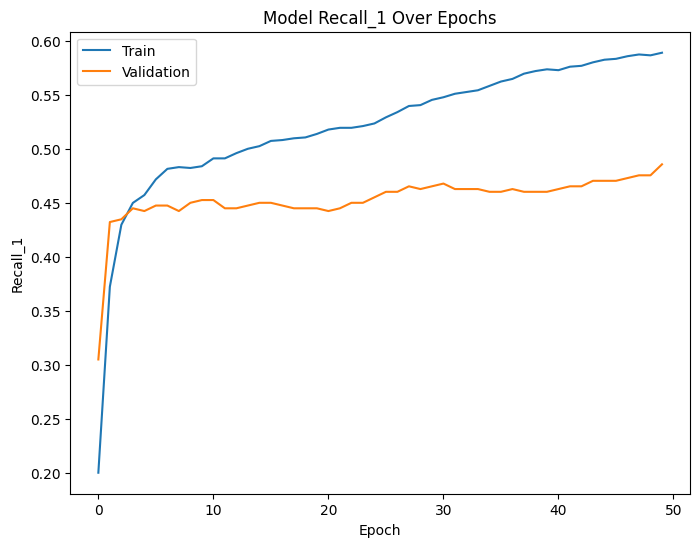

In [ ]:
plot(history_5, 'recall_1')

In [ ]:
results.loc[6] = [2, [64,32], ["relu", "tanh","relu"], 50, 32, "adam", [0.001, "-"], "-", history_5.history["loss"][-1], history_5.history["val_loss"][-1], history_5.history["recall_1"][-1], history_5.history["val_recall_1"][-1], round(end-start, 2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19
2,2,"[64, 32]","[relu, relu]",50,32,sgd,"[0.001, -]",-,0.423253,0.418190,0.199677,0.165394,36.98
3,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",-,0.288793,0.356381,0.556184,0.435115,37.88
4,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",dropout (0.2),0.330846,0.336032,0.494745,0.463104,55.52
5,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.001, _]",-,0.421783,0.416799,0.236055,0.203562,37.62
6,2,"[64, 32]","[relu, tanh, relu]",50,32,adam,"[0.001, -]",-,0.273088,0.385100,0.589329,0.486005,42.84


In [ ]:
# Predicting the results for the training set
y_train_pred = model_6.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Predicting the results for the validation set
y_val_pred = model_6.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Model name
model_name = "NN with SMOTE & Adam"

## Generate the classification report for the training and val set

In [ ]:
# Evaluate model performance using the corrected model variable
model_6_performance_train_metric = model_performance_classification(model_6, X_train, y_train)
print(model_6_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0  0.892333   0.839265  0.590946  0.693548


In [ ]:
 # Evaluate model performance using the corrected model variable and feature set
model_6_performance_val_metric = model_performance_classification(model_6, X_val, y_val)
print(model_6_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0     0.849   0.656357  0.486005   0.55848


## confusion matrix for the training validation set

Training Confusion Matrix:


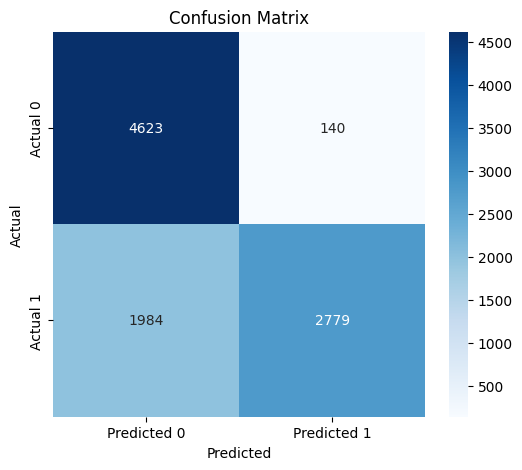

In [ ]:
# Calculating the confusion matrix for training data
print("Training Confusion Matrix:")
make_confusion_matrix(y_train_smote, y_train_pred)

Validation Confusion Matrix:


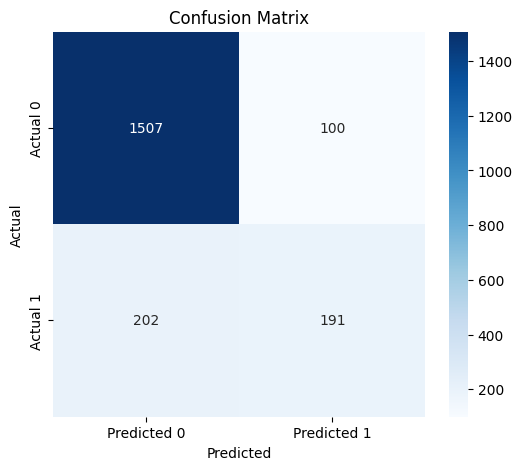

In [ ]:
# Calculating the confusion matrix for validation data
print("Validation Confusion Matrix:")
make_confusion_matrix(y_val, y_val_pred)

# Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout


# Model_7

In [ ]:
tf.keras.backend.clear_session()
# Fixing the seed for reproducibility
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model_7 = Sequential()

# Add input layer with relu activation
model_7.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

model_7.add(Dropout(0.3))

model_7.add(Dense(32, activation='relu'))

# Adding dropout
model_7.add(Dropout(0.3))

# Adding another hidden layer with 8 neurons and ReLU activation
model_7.add(Dense(8, activation='relu'))

model_7.add(Dense(1, activation='sigmoid'))

In [ ]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Defining the metric to be used (Recall in this case)
metric = Recall()

# Compiling the model with binary cross-entropy loss and recall as the metric
model_7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,121 (12.19 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=50
batch_size=32

In [ ]:
start = time.time()
history_6 = model_7.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5617 - recall: 0.1143 - val_loss: 0.4268 - val_recall: 0.1018
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4473 - recall: 0.1436 - val_loss: 0.4033 - val_recall: 0.2468
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4304 - recall: 0.2346 - val_loss: 0.3818 - val_recall: 0.3333
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4095 - recall: 0.3147 - val_loss: 0.3618 - val_recall: 0.3817
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3940 - recall: 0.3639 - val_loss: 0.3529 - val_recall: 0.3817
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3883 - recall: 0.3279 - val_loss: 0.3463 - val_recall: 0.3919
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3840 - recall: 0.3756 - val_loss: 0.3401 - val_recall: 0.4148
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3728 - recall: 0.3965 - val_loss: 0.3413 - val_recall: 0.3842
Epoch 9/

In [ ]:
# Print the total training time
print(f"Training time: {end - start:.2f} seconds")

Training time: 50.67 seconds


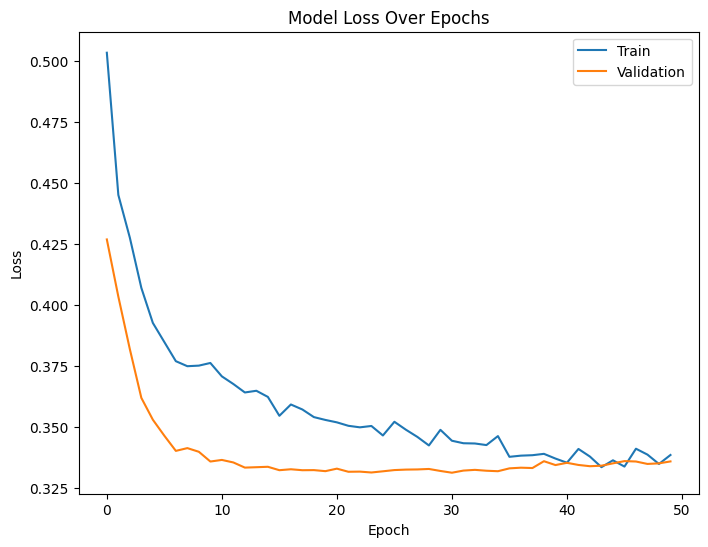

In [ ]:
plot(history_6, 'loss')

In [ ]:
# After fitting the model
print(history_6.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


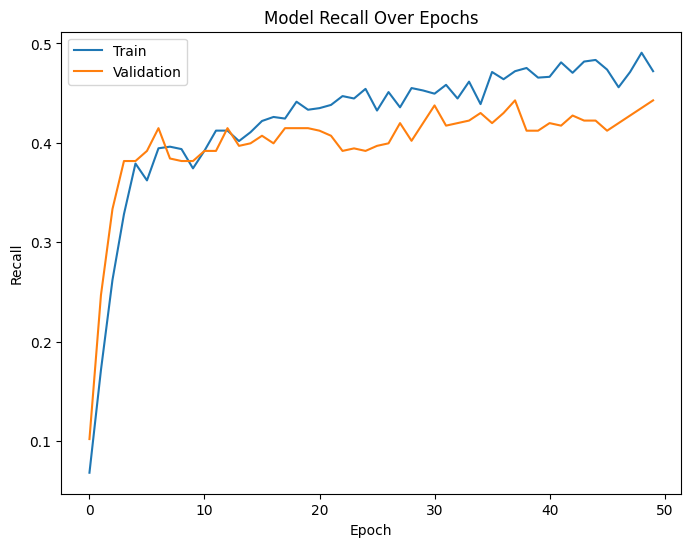

In [ ]:
plot(history_6, 'recall')

In [ ]:
results.loc[7] = [2,[64,32],["relu","relu", "relu"],50,32,"adam",[0.001, "-"],"dropout (0.3)",history_6.history["loss"][-1],history_6.history["val_loss"][-1],history_6.history["recall"][-1],history_6.history["val_recall"][-1],round(end-start,2)]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",regularization,train loss,validation loss,train recall,val_recall,time (secs)
0,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.9]",-,0.353578,0.345929,0.434115,0.427481,19.39
1,2,"[64, 32]",[relu],25,32,sgd,"[0.001, 0.4]",-,0.429431,0.423352,0.150364,0.119593,19.19
2,2,"[64, 32]","[relu, relu]",50,32,sgd,"[0.001, -]",-,0.423253,0.418190,0.199677,0.165394,36.98
3,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",-,0.288793,0.356381,0.556184,0.435115,37.88
4,2,"[64, 32]","[relu, tanh]",50,32,adam,"[0.001, -]",dropout (0.2),0.330846,0.336032,0.494745,0.463104,55.52
5,2,"[64, 32]","[relu, tanh]",50,32,sgd,"[0.001, _]",-,0.421783,0.416799,0.236055,0.203562,37.62
6,2,"[64, 32]","[relu, tanh, relu]",50,32,adam,"[0.001, -]",-,0.273088,0.385100,0.589329,0.486005,42.84
7,2,"[64, 32]","[relu, relu, relu]",50,32,adam,"[0.001, -]",dropout (0.3),0.338446,0.335810,0.472110,0.442748,50.67


In [ ]:
# Making predictions on training and validation sets
y_train_pred = model_7.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_val_pred = model_7.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Classification report for the training validation set

In [ ]:
# Model name for tracking results
model_name = "NN with SMOTE, Adam & Dropout"

In [ ]:
# Evaluate model performance using the corrected model variable
model_7_performance_train_metric = model_performance_classification(model_7, X_train, y_train)
print(model_7_performance_train_metric)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Accuracy  Precision    Recall  F1 Score
0  0.871833   0.815364  0.489086   0.61142


In [ ]:
 # Evaluate model performance using the corrected model variable and feature set
model_7_performance_val_metric = model_performance_classification(model_7, X_val, y_val)
print(model_7_performance_val_metric)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Accuracy  Precision    Recall  F1 Score
0    0.8625   0.756522  0.442748  0.558587


### confusion matrix train & val set

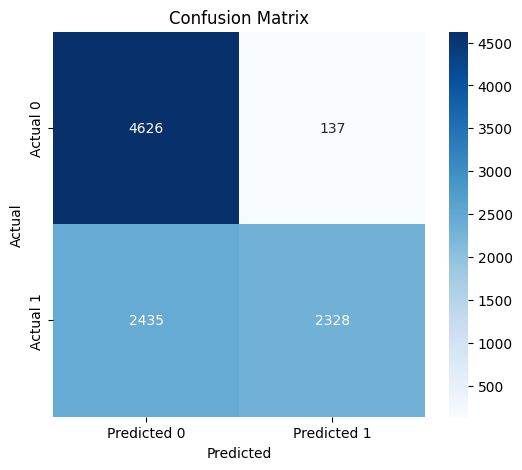

In [ ]:
# Calculating and plotting confusion matrix for training set
make_confusion_matrix(y_train_smote, y_train_pred)

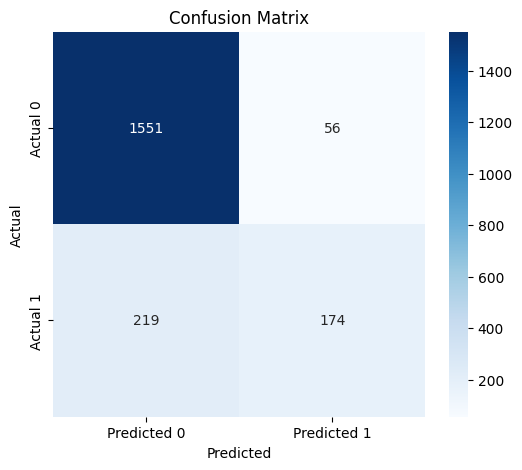

In [ ]:
# Calculating and plotting confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
models_Performance_Comparison_train_df = pd.concat(
    [
        model_0_performance_train_metric.T,
        model_1_performance_train_metric.T,
        model_2_performance_train_metric.T,
        model_3_performance_train_metric.T,
        model_4_performance_train_metric.T,
        model_5_performance_train_metric.T,
        model_6_performance_train_metric.T,
        model_7_performance_train_metric.T
    ],
    axis=1,
)

# Adjust the number of columns in the list to match the DataFrame
models_Performance_Comparison_train_df.columns = [
    "NN with SGD (learning_rate=0.001, momentum=0.9)",
    "NN with SGD (learning_rate=0.001, momentum=0.4)",
    "NN with SGD (learning_rate=0.001)",
    "NN with Adam",
    "NN with Adam & Dropout",
    "NN with SMOTE & SGD",
    "NN with SMOTE & Adam",
    "NN with SMOTE, Adam & Dropout"
]

In [ ]:
models_Performance_Comparison_train_df

,"NN with SGD (learning_rate=0.001, momentum=0.9)","NN with SGD (learning_rate=0.001, momentum=0.4)",NN with SGD (learning_rate=0.001),NN with Adam,NN with Adam & Dropout,NN with SMOTE & SGD,NN with SMOTE & Adam,"NN with SMOTE, Adam & Dropout"
Accuracy,0.855333,0.816500,0.821667,0.881500,0.874000,0.823833,0.892333,0.871833
Precision,0.760962,0.769841,0.750751,0.836317,0.792935,0.718447,0.839265,0.815364
Recall,0.434923,0.156831,0.202102,0.528698,0.526273,0.239289,0.590946,0.489086
F1 Score,0.553498,0.260578,0.318471,0.647845,0.632653,0.359005,0.693548,0.611420


### Observations:

*  NN with SGD (learning_rate=0.001, momentum=0.9): 0.434923

*   NN with SGD (learning_rate=0.001, momentum=0.4): 0.156831

*  NN with SGD (learning_rate=0.001): 0.202102

*  NN with Adam: 0.529507

*  NN with Adam & Dropout: 0.510105

*  NN with SMOTE & SGD: 0.239289

*  NN with SMOTE & Adam: 0.590946

*  NN with SMOTE, Adam & Dropout: 0.494745

**Best Model Based on Recall:**

*  The model "NN with SMOTE & Adam" has the highest recall value of 0.590946, which makes it the best model in terms of recall.

In [ ]:
models_Performance_Comparison_valid_df  = pd.concat(
    [
        model_0_performance_val_metric.T,
        model_1_performance_val_metric.T,
        model_2_performance_val_metric.T,
        model_3_performance_val_metric.T,
        model_4_performance_val_metric.T,
        model_5_performance_val_metric.T,
        model_6_performance_val_metric.T,
        model_7_performance_val_metric.T
    ],
    axis=1,
)

models_Performance_Comparison_valid_df.columns = [
    "NN with SGD (learning_rate=0.001, momentum=0.9)",
    "NN with SGD (learning_rate=0.001, momentum=0.4)",
    "NN with SGD (learning_rate=0.001)",
    "NN with Adam",
    "NN with Adam & Dropout",
    "NN with SMOTE & SGD",
    "NN with SMOTE & Adam",
    "NN with SMOTE, Adam & Dropout"
]

In [ ]:
models_Performance_Comparison_valid_df

,"NN with SGD (learning_rate=0.001, momentum=0.9)","NN with SGD (learning_rate=0.001, momentum=0.4)",NN with SGD (learning_rate=0.001),NN with Adam,NN with Adam & Dropout,NN with SMOTE & SGD,NN with SMOTE & Adam,"NN with SMOTE, Adam & Dropout"
Accuracy,0.860500,0.813500,0.817500,0.851500,0.856500,0.820000,0.849000,0.862500
Precision,0.756757,0.635135,0.637255,0.695122,0.705426,0.629921,0.656357,0.756522
Recall,0.427481,0.119593,0.165394,0.435115,0.463104,0.203562,0.486005,0.442748
F1 Score,0.546341,0.201285,0.262626,0.535211,0.559140,0.307692,0.558480,0.558587


### Observations:

*  NN with SGD (learning_rate=0.001, momentum=0.9): 0.427481

*  NN with SGD (learning_rate=0.001, momentum=0.4): 0.119593

*  NN with SGD (learning_rate=0.001): 0.165394

*  NN with Adam: 0.437659

*  NN with Adam & Dropout: 0.465649

*  NN with SMOTE & SGD: 0.203562

*  NN with SMOTE & Adam: 0.486005

*  NN with SMOTE, Adam & Dropout: 0.435115

**Best Model Based on Recall (Validation):**

*  The model "NN with SMOTE & Adam" has the highest recall value of 0.486005, making it the best model for recall in the validation set.

In [ ]:
# Compare the training and validation metrics
# Note: Ensure both DataFrames have the same dimensions and are comparable
comparison_df = models_Performance_Comparison_train_df - models_Performance_Comparison_valid_df
print("\nDifference between Training and Validation Metrics:")



Difference between Training and Validation Metrics:


In [ ]:
comparison_df

,"NN with SGD (learning_rate=0.001, momentum=0.9)","NN with SGD (learning_rate=0.001, momentum=0.4)",NN with SGD (learning_rate=0.001),NN with Adam,NN with Adam & Dropout,NN with SMOTE & SGD,NN with SMOTE & Adam,"NN with SMOTE, Adam & Dropout"
Accuracy,-0.005167,0.003000,0.004167,0.030000,0.017500,0.003833,0.043333,0.009333
Precision,0.004205,0.134706,0.113496,0.141195,0.087509,0.088525,0.182908,0.058842
Recall,0.007442,0.037238,0.036707,0.093584,0.063169,0.035726,0.104941,0.046338
F1 Score,0.007156,0.059293,0.055845,0.112634,0.073513,0.051313,0.135069,0.052832


### Observations:

Based on the difference between the training and validation metrics in the comparison_df, here are the recall differences for each model:

*  NN with SGD (learning_rate=0.001, momentum=0.9): 0.007442

*  NN with SGD (learning_rate=0.001, momentum=0.4): 0.037238

*  NN with SGD (learning_rate=0.001): 0.036707

*  NN with Adam: 0.091848

*  NN with Adam & Dropout: 0.044456

*  NN with SMOTE & SGD: 0.035726

*  NN with SMOTE & Adam: 0.104941

*  NN with SMOTE, Adam & Dropout: 0.059631

**Best Model Based on Recall Difference (Training vs. Validation):**

*  The model "NN with SMOTE & Adam" has the highest recall value of 0.104941.

In [ ]:
models_Performance_Comparison_train_df.loc["Recall"] - models_Performance_Comparison_valid_df.loc["Recall"]

,Recall
"NN with SGD (learning_rate=0.001, momentum=0.9)",0.007442
"NN with SGD (learning_rate=0.001, momentum=0.4)",0.037238
NN with SGD (learning_rate=0.001),0.036707
NN with Adam,0.093584
NN with Adam & Dropout,0.063169
NN with SMOTE & SGD,0.035726
NN with SMOTE & Adam,0.104941
"NN with SMOTE, Adam & Dropout",0.046338


### Observations:

*   The best model based on recall difference (Training - Validation) is "NN with SMOTE & Adam", which has the highest difference of 0.104941. This indicates that this model shows the greatest improvement in recall on the validation set compared to the training set.


## Best_model

In [ ]:
# Assign the best model to the variable best_model
best_model = model_6

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Convert predictions to binary class labels (0 or 1) using a 0.5 threshold
y_test_pred = (y_test_pred > 0.5)

# Print the binary predictions
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1593
         1.0       0.66      0.49      0.56       407

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.84      2000



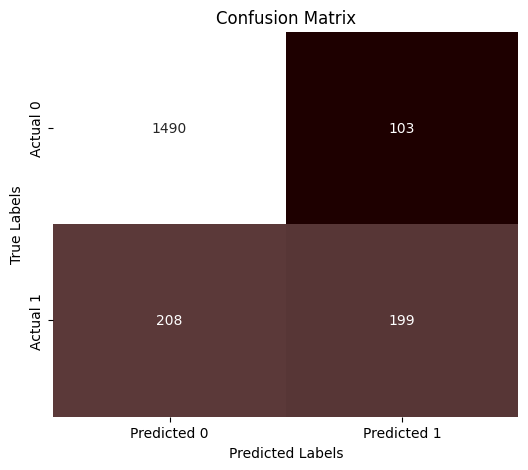

In [ ]:
# Assuming y_test and y_test_pred are already defined
cm = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Observations:

**Model_6**

"NN with SMOTE & Adam" is the best model.

## Final Model

##Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Use Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = tf.keras.metrics.Recall()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=50
batch_size=32

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5081 - recall_1: 0.1903 - val_loss: 0.4054 - val_recall_1: 0.3053
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3973 - recall_1: 0.3402 - val_loss: 0.3594 - val_recall_1: 0.4326
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3643 - recall_1: 0.3970 - val_loss: 0.3440 - val_recall_1: 0.4351
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3537 - recall_1: 0.4144 - val_loss: 0.3393 - val_recall_1: 0.4453
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3481 - recall_1: 0.4295 - val_loss: 0.3371 - val_recall_1: 0.4427
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3443 - recall_1: 0.4436 - val_loss: 0.3357 - val_recall_1: 0.4478
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3413 - recall_1: 0.4545 - val_loss: 0.3349 - val_recall_1: 0.4478
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3389 - recall_1: 0.4569 - val_loss: 0.3344

In [ ]:
print(f"Training time: {end - start} seconds")

Training time: 40.28904414176941 seconds


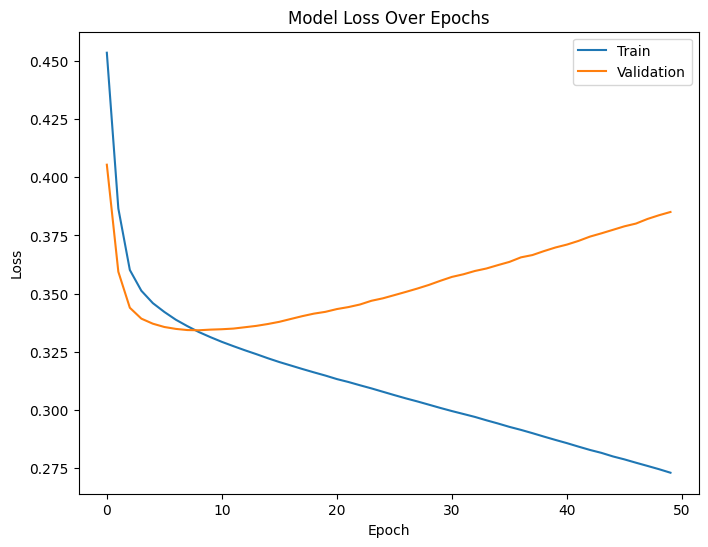

In [ ]:
plot(history, 'loss')

In [ ]:
# After fitting the model
print(history.history.keys())

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])


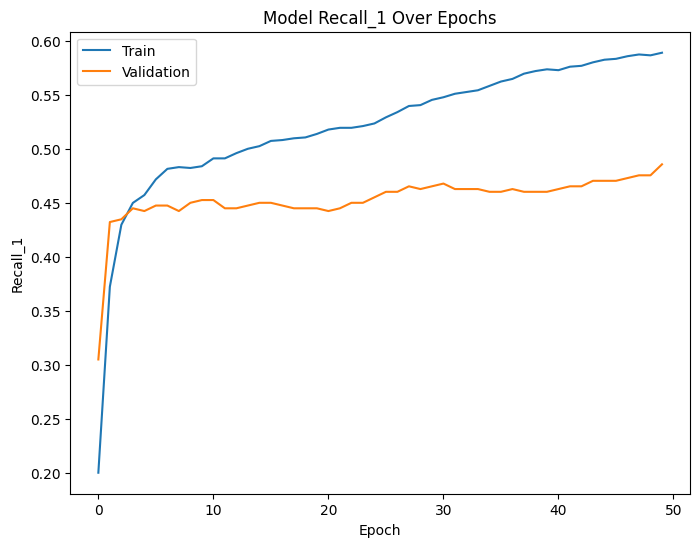

In [ ]:
plot(history, 'recall_1')

In [ ]:
# Model name
model_name = "NN with SMOTE & Adam"

In [ ]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Train data classification report
print("Classification Report - Train data", end="\n\n")
train_cr = classification_report(y_train, (y_train_pred > 0.5).astype(int))
print(train_cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      4763
         1.0       0.84      0.59      0.69      1237

    accuracy                           0.89      6000
   macro avg       0.87      0.78      0.81      6000
weighted avg       0.89      0.89      0.88      6000



In [ ]:
# Validation data classification report
print("Classification Report - Validation data", end="\n\n")
valid_cr = classification_report(y_val, (y_val_pred > 0.5).astype(int))
print(valid_cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1607
         1.0       0.66      0.49      0.56       393

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
# Train data classification report
print("Classification Report - Test data", end="\n\n")
test_cr = classification_report(y_test, (y_test_pred>0.5).astype(int))
print(test_cr)

Classification Report - Test data

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1593
         1.0       0.66      0.49      0.56       407

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.84      2000



## Actionable Insights and Business Recommendations

**Actionable Insights:**

*  The weighted F1 score for the model is ~0.73, showing that the model performs moderately well in predicting customer churn. However, there is room to improve the recall for the minority class (churned customers) to ensure better identification of at-risk customers.

*  Precision for the non-churn class is high, indicating the model reliably identifies loyal customers, but recall for the churn class needs attention, as some churned customers are being misclassified as loyal.

**Business Insights and Recommendations Focus on Retention Strategies:**

*  Businesses like banks rely heavily on retaining their existing customers, as acquiring new customers is often more expensive. Use the model to identify customers at risk of churn and proactively reach out to them with tailored offers or enhanced services.

**Understand Key Drivers of Churn:**

*   Analyze the feature importance from the model to identify which factors (e.g., low usage of online banking, high credit card utilization, or limited transactions) contribute most to churn. Target these areas for improvement.

**Enhance Service Quality:**

*  Offer improved customer support, faster resolution of complaints, and more personalized financial solutions to increase satisfaction among customers flagged as likely to churn.

**Proactive Engagement with At-Risk Customers:**

*  Use the model’s predictions to create early warning systems. Contact high-risk customers with loyalty programs, financial incentives, or personalized consultations to address their needs before they consider leaving.

**Develop Targeted Offers:**

*  For customers likely to churn due to competitive offerings, create exclusive benefits such as lower fees, cashback offers, or higher rewards on financial products to keep them engaged.

**Leverage Digital Channels:**

*  Promote the usage of digital and online services, as customers who actively engage with these are less likely to churn. Provide training sessions or assistance to ensure customers are comfortable with online tools.

**Monitor and Reevaluate Regularly:**

*  Continuously monitor the model’s performance and update it with new customer data to capture evolving patterns. Periodic evaluations ensure the insights remain actionable and relevant.

**Incentivize Feedback Collection:**

*  Encourage customers to provide feedback about their dissatisfaction through surveys or service channels. Address these concerns promptly to improve customer experience.

*  By focusing on these recommendations, banks can not only reduce churn but also strengthen customer loyalty and enhance overall satisfaction, leading to long-term growth and stability.